# Análisis Espaciotemporal del Rendimiento del Arroz secnao Mecanizado en Colombia (2006–2023)

## Introducción

El arroz es uno de los cultivos más importantes para la seguridad alimentaria en Colombia, en los departamentos donde se concentra una parte significativa de la producción nacional bajo condiciones mecanizadas. En el contexto del cambio climático, resulta fundamental analizar cómo ha variado el rendimiento del arroz en relación con factores ambientales y climáticos.

Este cuaderno busca integrar información de distintas fuentes oficiales para observar el comportamiento temporal del rendimiento del arroz mecanizado en Colombia, y establecer una base para su análisis geoespacial.

## Objetivo

Evaluar el comportamiento del rendimiento del arroz MECANIZADO en Colombia desde 2006 hasta 2023, con énfasis en los departamentos de Colombia, identificando patrones, variaciones y posibles relaciones con condiciones climáticas a nivel nacional y departamental.

## Preguntas de investigación
¿Cómo se distribuye espacial y temporalmente la precipitación en las zonas arroceras del país?

¿Qué relación existe entre las anomalías de precipitación y los rendimientos de arroz?

¿Cuáles regiones presentan mayor vulnerabilidad climática para el cultivo de arroz?

## Fuentes de datos

- **Agronet**: Datos departamentales de área sembrada, producción y rendimiento del arroz de riego en Colombia (2006–2023).
- https://www.agronet.gov.co/estadistica/Paginas/home.aspx?cod=3
- https://www.agronet.gov.co/estadistica/Paginas/home.aspx?cod=1
- **FAO (FAOSTAT)**: Datos agregados nacionales de área cosechada, producción y rendimiento del arroz (2001–2023).
- https://www.fao.org/faostat/en/#data/QCL
- **SIPRA** https://sipra.upra.gov.co/nacional/consulta-documentos
- **Variables climáticas**: Pendiente de integración. Se planea utilizar información de temperatura y precipitación proveniente de CHIRPS, ERA5, MOD16A2, NDVI (MODIS)

## Estructura del análisis

1. **Carga y limpieza de los datos**
2. **Exploración estadística y visualización**
3. **Comparación de datos Agronet vs. FAO**
4. **Análisis por departamento (Tolima y Huila)**
5. **Tendencias nacionales del rendimiento**
6. **Preparación de datos para análisis con clima (por integrar)**

---



### 1. Carga y limpieza de los datos
Se obtienen datos de rendimientos de cultivo de arroz mecanizado en diferentes departamentos de Colombia de Agronet, y valores de rendimientos de cultivo de todo Colombia por año de la FAO
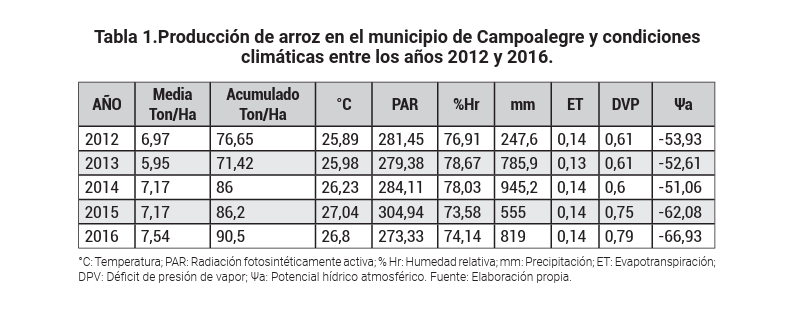

Leer datos

In [1]:
import pandas as pd

# Ruta al archivo
ruta_archivo = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer la hoja 'BaseDatosArroz' usando la segunda fila como encabezado
df = pd.read_excel(ruta_archivo, sheet_name='Sheet1', header=0)

# Mostrar las primeras filas
print(df.head())



  Departamento    Area      Rend   Año Semestre Rend_Cuartil  \
0         Meta   620.0  0.050757  2013        I         Bajo   
1         Meta   620.0  0.036582  2013       II         Bajo   
2     Casanare  6358.6  0.343188  2013        I         Bajo   
3     Casanare  6358.6  0.307771  2013       II         Bajo   
4         Meta  7572.1  0.619896  2013        I   Medio-Alto   

   Bajo_Rendimiento municipio_norm semester_GEE  precip_accum_mm  \
0                 1        ACACIAS          1-6      1771.063271   
1                 1        ACACIAS         7-12      1895.331576   
2                 1        AGUAZUL          1-6       921.609069   
3                 1        AGUAZUL         7-12      1235.895755   
4                 0       CABUYARO          1-6      1231.824421   

  municipio_fao  precipitacion_alta       lat        lon  \
0       Acacias                   1  4.009658 -73.723954   
1       Acacias                   1  4.009658 -73.723954   
2       Aguazul           

In [2]:
print(df.info())
print(df.describe())
# Eliminar registros sin datos útiles
df = df[(df['Area'] > 0) & (df['Rend'] > 0)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Departamento        654 non-null    object 
 1   Area                654 non-null    float64
 2   Rend                654 non-null    float64
 3   Año                 654 non-null    int64  
 4   Semestre            654 non-null    object 
 5   Rend_Cuartil        654 non-null    object 
 6   Bajo_Rendimiento    654 non-null    int64  
 7   municipio_norm      654 non-null    object 
 8   semester_GEE        654 non-null    object 
 9   precip_accum_mm     654 non-null    float64
 10  municipio_fao       654 non-null    object 
 11  precipitacion_alta  654 non-null    int64  
 12  lat                 654 non-null    float64
 13  lon                 654 non-null    float64
 14  geometry            654 non-null    object 
dtypes: float64(5), int64(3), object(7)
memory usage: 76.8+ KB

## Distribución del rendimiento

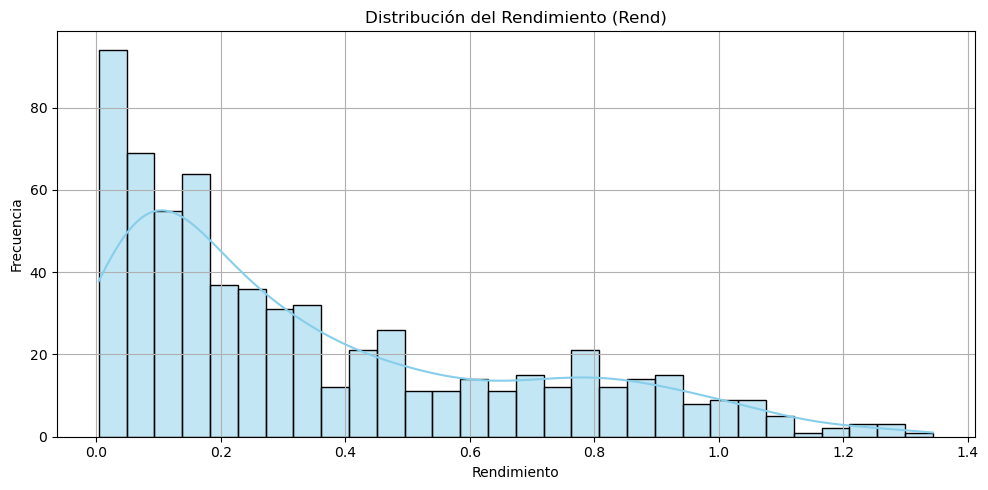

C:\Users\paola\AppData\Local\Temp\ipykernel_25688\3734482479.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bajo_Rendimiento', data=df, palette='Set2')


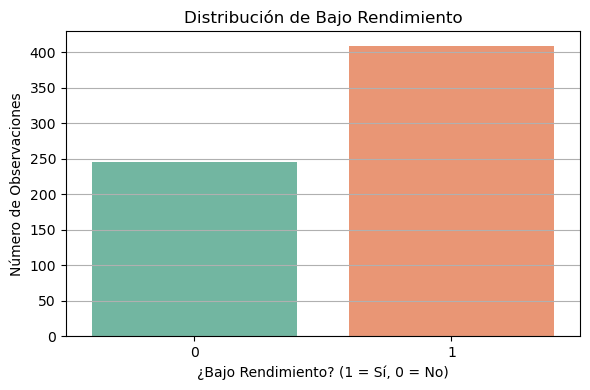

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel
archivo = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(archivo)

# Reemplazar comas por puntos si 'Rend' está como texto
df['Rend'] = df['Rend'].astype(str).str.replace(',', '.').astype(float)

# Gráfico 1: Distribución de Rendimiento (Rend)
plt.figure(figsize=(10, 5))
sns.histplot(df['Rend'], kde=True, bins=30, color='skyblue')
plt.title("Distribución del Rendimiento (Rend)")
plt.xlabel("Rendimiento")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Conteo de Bajo_Rendimiento
plt.figure(figsize=(6, 4))
sns.countplot(x='Bajo_Rendimiento', data=df, palette='Set2')
plt.title("Distribución de Bajo Rendimiento")
plt.xlabel("¿Bajo Rendimiento? (1 = Sí, 0 = No)")
plt.ylabel("Número de Observaciones")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## Desproporción de los datos (variable binaria de rendimiento)
¿Qué puedes hacer?
Medir el desempeño con métricas apropiadas, no solo accuracy:

precision, recall, f1-score, ROC-AUC.

(Opcional) Balancear las clases si fuera necesario:

Con técnicas como:

class_weight='balanced' en LogisticRegression.

Oversampling (ej. SMOTE) o undersampling.

Mantener la proporción original si tu objetivo es interpretar el comportamiento real (por ejemplo, identificar municipios en riesgo de bajo rendimiento).

## Anexar coordenadas a los municipios - exploración de shapefile

Importante mejorar el código para que busque o extraiga coordenadas de la web -- HECHO!!!

## Construir un dataframe con solo los municipios que necesito ------- VOLVER A REPETIR ------ DESCARGARON MAL LOS VALORES DE GEE


## GRAFICAR DATOS DE PRECIPITACIÓN PARA ENTENDER VALORES ------ PENDIENTE VOLVER A DESCARGAR POR ANOMALÍAS EN LOS DATOS

## GENERACIÓN DE DATOS DE PRECIPITACIÓN ALEATORIA PARA CONSTRUIR EL CÓDIGO DE LA REGRESIÓN LOGÍSTICA MIENTRAS QUE LOGRO TENER LOS DATOS DE PRECIPITACIÓN REAL

Además, el arroz requiere más agua que cualquier otro cultivo. Como resultado, el cultivo de arroz solo se realiza en aquellas áreas donde la precipitación mínima es de 115 cm. Aunque las regiones están teniendo un promedio anual de lluvia entre 175 a 300 cm, son las más adecuadas. También necesita condiciones de inundación con la profundidad del agua que varía más de 25 mm, en el momento del trasplante hasta 150 mm, durante 10 semanas del período de crecimiento. (SAG, 2010) (Secretaría de Agricultura y Ganadería, SAG, 2010)

#### CRITERIO DE EXCESO DE AGUA: VALORES MAYORES A 300 cm O 3000 mm ANUALES, ES DECIR 1500 mm SEMESTRALES

# Análisis de Precipitación para Municipios de Meta y Casanare (2013-2023)

Para evaluar el balance hídrico asociado al cultivo de arroz en los departamentos de Meta y Casanare, se seleccionaron 31 municipios que cuentan con datos de rendimiento agrícola reportados por Fedearroz durante el periodo 2013-2023. Estos municipios son:

**Granada, Villanueva, Puerto Rico, Aguazul, Hato Corozal, Mani, Nunchía, Orocué, Paz de Ariporo, Pore, San Luis de Palenque, Tauramena, Trinidad, Yopal, San Martín, Acacías, Cabuyaro, Castilla la Nueva, Cumaral, El Castillo, Fuente de Oro, Lejanías, Puerto Concordia, Puerto Gaitán, Puerto Lleras, Puerto López, Restrepo, San Carlos de Guaroa, San Juan de Arama, Villavicencio, Vistahermosa.**

---

## Metodología

1. **Carga y filtrado espacial de municipios**  
   Se utilizó la capa oficial de municipios de Colombia (FAO GAUL 2015, nivel 2) y se filtraron únicamente los municipios listados anteriormente pertenecientes a Meta y Casanare. Esto garantiza la correspondencia con los datos de rendimiento agrícola disponibles.

2. **Obtención de datos de precipitación diaria**  
   Se empleó la colección CHIRPS (`UCSB-CHG/CHIRPS/DAILY`), que proporciona registros satelitales diarios de precipitación con cobertura adecuada para los municipios de interés en el periodo 2013-2023.

3. **Agregación temporal semestral de precipitación**  
   Se definieron dos semestres por año: enero-junio y julio-diciembre. Para cada semestre, se sumaron las precipitaciones diarias para obtener la precipitación acumulada del periodo.

4. **Cálculo espacial del promedio de precipitación**  
   Para cada semestre y municipio, se calculó la precipitación promedio acumulada (en milímetros) dentro de la geometría municipal, utilizando un reductor espacial de promedio en Google Earth Engine (GEE).

5. **Exportación y análisis posterior**  
   Los resultados se consolidaron en una tabla que incluye: departamento, municipio, año, semestre y precipitación acumulada promedio. Esta información será integrada con los datos de rendimiento agrícola para futuros análisis estadísticos y modelación de la influencia de la precipitación en el cultivo de arroz.

---

Este análisis proporciona una base cuantitativa para evaluar el balance hídrico requerido por el cultivo de arroz en estas regiones, lo que es fundamental para la validación de condiciones climáticas y el desarrollo de modelos predictivos de rendimiento agrícola.


https://code.earthengine.google.com/ac704b48dc574a7431271aa11694a33d


In [4]:
import pandas as pd

# Ruta del archivo
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\Precipitacion_promedio_semestre_Meta_Casanare_2013_2023.csv"

# Leer el archivo CSV
df = pd.read_csv(ruta)

# Mostrar primeras filas
print("Primeras filas del archivo:")
print(df.head())

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Convertir 'year' a entero si es necesario
df['year'] = df['year'].astype(int)

# ---------------------
# ESTADÍSTICAS GENERALES
# ---------------------
print("\nResumen estadístico general:")
print(df['precip_accum_avg_mm'].describe())

promedio_total = df['precip_accum_avg_mm'].mean()
print(f"\nPromedio total de precipitación acumulada: {promedio_total:.2f} mm")

# ---------------------
# PROMEDIO POR MUNICIPIO
# ---------------------
promedio_por_municipio = df.groupby('municipio')['precip_accum_avg_mm'].mean().sort_values(ascending=False)
print("\nPromedio por municipio:")
print(promedio_por_municipio)

# ---------------------
# PROMEDIO POR DEPARTAMENTO
# ---------------------
promedio_por_departamento = df.groupby('departamento')['precip_accum_avg_mm'].mean()
print("\nPromedio por departamento:")
print(promedio_por_departamento)

# ---------------------
# PROMEDIO POR AÑO
# ---------------------
promedio_por_ano = df.groupby('year')['precip_accum_avg_mm'].mean()
print("\nPromedio por año:")
print(promedio_por_ano)

# ---------------------
# PROMEDIO POR SEMESTRE (AÑO + SEMESTRE)
# ---------------------
promedio_por_semestre = df.groupby(['year', 'semester'])['precip_accum_avg_mm'].mean()
print("\nPromedio por año y semestre:")
print(promedio_por_semestre)


Primeras filas del archivo:
  departamento     municipio    year semester  precip_accum_avg_mm
0     Casanare       Aguazul  2013.0      1-6           921.609069
1     Casanare  Hato Corozal  2013.0      1-6           835.941310
2     Casanare          Mani  2013.0      1-6           942.316088
3     Casanare       Nunchia  2013.0      1-6           801.662371
4     Casanare        Orocue  2013.0      1-6           966.614371

Tipos de datos:
departamento            object
municipio               object
year                   float64
semester                object
precip_accum_avg_mm    float64
dtype: object

Resumen estadístico general:
count     682.000000
mean     1377.233011
std       326.255957
min       561.006110
25%      1160.743772
50%      1390.012769
75%      1585.161854
max      2455.538822
Name: precip_accum_avg_mm, dtype: float64

Promedio total de precipitación acumulada: 1377.23 mm

Promedio por municipio:
municipio
Restrepo                1835.459439
Castilla La Nueva 

## Análisis del Requerimiento Hídrico para el Cultivo de Arroz

El cultivo de arroz es altamente dependiente del agua y requiere condiciones específicas para un desarrollo óptimo. Según la Secretaría de Agricultura y Ganadería (SAG, 2010), el arroz necesita:

- Un mínimo de **1150 mm de precipitación anual** para asegurar un crecimiento adecuado.
- Condiciones de inundación controlada con una profundidad de agua variable entre **25 mm y 150 mm** durante aproximadamente **10 semanas** del período de crecimiento, especialmente desde el trasplante.

---

## Evaluación de los Resultados de Precipitación

A partir de los datos procesados en Google Earth Engine, se calcularon las precipitaciones promedio semestrales y anuales para los 31 municipios con datos de rendimiento agrícola de Fedearroz entre 2013 y 2023. Los promedios obtenidos indican que:

- La suma de las precipitaciones promedio de ambos semestres de un año supera el mínimo requerido de 1150 mm para el arroz en la mayoría de los casos.
- Esto sugiere que, desde el punto de vista pluviométrico, la disponibilidad de agua es suficiente para el cultivo en estas regiones.
- Sin embargo, se debe considerar que el promedio anual puede ocultar variaciones estacionales importantes, por lo que un análisis detallado por semestre es crucial para evaluar periodos de déficit o exceso de agua.

---

## Próximos Pasos en el Análisis

- Integrar los datos de precipitación promedio semestral y anual con los datos de rendimiento agrícola para construir un modelo de regresión que permita evaluar la relación entre variables climáticas y productividad.
- Ajustar y validar el modelo considerando la variabilidad temporal y espacial de la precipitación y otros factores ambientales.
- Establecer umbrales de precipitación e inundación que influyan significativamente en el rendimiento del cultivo, para orientar estrategias de manejo y adaptación agrícola.

Este enfoque permitirá avanzar hacia una comprensión más precisa de cómo las condiciones climáticas afectan el cultivo de arroz y ayudará a tomar decisiones basadas en evidencia para mejorar la productividad y sostenibilidad en las regiones estudiadas.


In [5]:
import pandas as pd
import unidecode

# Función para normalizar nombres (sin tildes, mayúsculas, sin espacios extremos)
def normalizar(texto):
    if pd.isna(texto):
        return ""
    texto = unidecode.unidecode(texto).upper().strip()
    return texto

# Rutas de los archivos
csv_path = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\Precipitacion_promedio_semestre_Meta_Casanare_2013_2023.csv"
xlsx_path = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_municipio_fao.xlsx"

# Leer datos
df_csv = pd.read_csv(csv_path)
df_xlsx = pd.read_excel(xlsx_path)

# Normalizar nombres municipios
df_csv['municipio_norm'] = df_csv['municipio'].apply(normalizar)
df_xlsx['municipio_norm'] = df_xlsx['municipio_fao'].apply(normalizar)

# Asegurar que 'year' y 'semester' sean del mismo tipo y formato
df_csv['year'] = df_csv['year'].astype(int)
df_xlsx['year'] = df_xlsx['year'].astype(int)

# Opcional: uniformizar semester, en caso que tenga formato distinto (por ejemplo 1-6)
df_csv['semester'] = df_csv['semester'].astype(str).str.strip()
df_xlsx['semester'] = df_xlsx['semester'].astype(str).str.strip()

# Merge por municipio_norm, year y semester para comparar precipitación
df_merged = pd.merge(
    df_xlsx[['municipio_norm', 'year', 'semester', 'precip_accum_avg_mm']],
    df_csv[['municipio_norm', 'year', 'semester', 'precip_accum_avg_mm']],
    on=['municipio_norm', 'year', 'semester'],
    suffixes=('_xlsx', '_csv'),
    how='inner'  # solo municipios y periodos que aparecen en ambos
)

# Calcular diferencia entre precipitaciones
df_merged['diferencia_precip'] = df_merged['precip_accum_avg_mm_xlsx'] - df_merged['precip_accum_avg_mm_csv']

# Mostrar algunas filas para inspección
print(df_merged.head())

# Guardar resultado a Excel si quieres
df_merged.to_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\Comparacion_Precipitacion.xlsx", index=False)


KeyError: 'year'

In [ ]:
import pandas as pd

# Ruta del archivo
xlsx_path = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_municipio_fao.xlsx"

# Cargar el archivo Excel
df = pd.read_excel(xlsx_path)

# Verificar las columnas para asegurarnos que la columna existe
print(df.columns)

# Crear la columna "precipitacion_alta"
df['precipitacion_alta'] = (df['precip_accum_avg_mm'] > 1500).astype(int)

# Guardar el resultado en un nuevo archivo para no sobrescribir
output_path = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta.xlsx"
df.to_excel(output_path, index=False)

print("Archivo guardado con la nueva columna 'precipitacion_alta'.")


## REGRESIÓN LOGÍSTICA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Leer el archivo Excel
df = pd.read_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx")

# Corregir decimales en 'Area' y 'precip_accum_avg_mm'
df['Area'] = df['Area'].apply(lambda x: float(str(x).replace(',', '.')))
df['precip_accum_avg_mm'] = df['precip_accum_avg_mm'].apply(lambda x: float(str(x).replace(',', '.')))

# Convertir 'Año' y 'Semestre' a string para codificación categórica
df['Año'] = df['Año'].astype(str)
df['Semestre'] = df['Semestre'].astype(str)

# Eliminar filas con valores faltantes en columnas clave
df = df.dropna(subset=['Departamento', 'Area', 'Año', 'Semestre', 'precip_accum_avg_mm', 'precipitacion_alta', 'Bajo_Rendimiento'])

# Variables independientes
X = df[['Departamento', 'Area', 'Año', 'Semestre', 'precip_accum_avg_mm', 'precipitacion_alta']]
y = df['Bajo_Rendimiento']

# Preprocesamiento: OneHotEncoder para las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Departamento', 'Año', 'Semestre'])
    ],
    remainder='passthrough'  # deja Area, precip_accum_avg_mm y precipitacion_alta sin transformar
)

X_processed = preprocessor.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, stratify=y, random_state=42
)

# Entrenar modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Leer el archivo Excel
df = pd.read_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx")

# Corregir decimales en 'Area' y 'precip_accum_mm'
df['Area'] = df['Area'].apply(lambda x: float(str(x).replace(',', '.')))
df['precip_accum_mm'] = df['precip_accum_mm'].apply(lambda x: float(str(x).replace(',', '.')))

# Convertir 'Año' y 'Semestre' a string para codificación categórica
df['Año'] = df['Año'].astype(str)
df['Semestre'] = df['Semestre'].astype(str)

# Eliminar filas con valores faltantes en columnas clave
df = df.dropna(subset=['Departamento', 'Area', 'Año', 'Semestre', 'precip_accum_mm', 'precipitacion_alta', 'Bajo_Rendimiento'])

# Explicación variables
print("\n### Variables usadas en el modelo de regresión logística:\n")
print("- **Variables independientes (X):**")
print("  - Departamento (categórica): región administrativa del cultivo.")
print("  - Área (numérica): extensión del área cultivada.")
print("  - Año (categórica): año de registro de los datos.")
print("  - Semestre (categórica): semestre del año.")
print("  - Precipitación acumulada (numérica): cantidad promedio de lluvia acumulada.")
print("  - Variable binaria de alta precipitación (precipitacion_alta): indica si hubo alta precipitación.\n")
print("- **Variable dependiente (y):**")
print("  - Bajo_Rendimiento (binaria): indica si el rendimiento del cultivo fue bajo (1) o no (0).\n")

# Variables independientes y dependientes
X = df[['Departamento', 'Area', 'Año', 'Semestre', 'precip_accum_mm', 'precipitacion_alta']]
y = df['Bajo_Rendimiento']

# Preprocesamiento: OneHotEncoder para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Departamento', 'Año', 'Semestre'])
    ],
    remainder='passthrough'  # deja variables numéricas sin modificar
)
X_processed = preprocessor.fit_transform(X)

print("Preprocesamiento: Las variables categóricas 'Departamento', 'Año' y 'Semestre' se codifican con OneHotEncoder, eliminando la primera categoría para evitar multicolinealidad.\n")

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, stratify=y, random_state=42
)
print("División de datos:")
print(f"- Tamaño conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"- Tamaño conjunto de prueba: {X_test.shape[0]} muestras\n")

# Entrenar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)
print("Modelo de regresión logística entrenado con los datos de entrenamiento.\n")

# Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluación
print("Resultados del modelo:\n")

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

print("\nInterpretación:")
print("- La matriz de confusión muestra la cantidad de aciertos y errores del modelo en cada categoría.")
print("- El reporte de clasificación da métricas de precisión, recall y F1-score para cada clase.")
print("- El ROC AUC Score indica la capacidad del modelo para distinguir entre las clases, siendo 1 perfecto y 0.5 un modelo aleatorio.\n")


### Variables usadas en el modelo de regresión logística:

- **Variables independientes (X):**
  - Departamento (categórica): región administrativa del cultivo.
  - Área (numérica): extensión del área cultivada.
  - Año (categórica): año de registro de los datos.
  - Semestre (categórica): semestre del año.
  - Precipitación acumulada (numérica): cantidad promedio de lluvia acumulada.
  - Variable binaria de alta precipitación (precipitacion_alta): indica si hubo alta precipitación.

- **Variable dependiente (y):**
  - Bajo_Rendimiento (binaria): indica si el rendimiento del cultivo fue bajo (1) o no (0).

Preprocesamiento: Las variables categóricas 'Departamento', 'Año' y 'Semestre' se codifican con OneHotEncoder, eliminando la primera categoría para evitar multicolinealidad.

División de datos:
- Tamaño conjunto de entrenamiento: 457 muestras
- Tamaño conjunto de prueba: 197 muestras

In [ ]:
print(df.columns.tolist())
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Leer el archivo Excel
df = pd.read_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx")

# Corregir decimales en 'Area' y 'precip_accum_mm'
df['Area'] = df['Area'].apply(lambda x: float(str(x).replace(',', '.')))
df['precip_accum_mm'] = df['precip_accum_mm'].apply(lambda x: float(str(x).replace(',', '.')))

# Convertir 'Año' y 'Semestre' a string para codificación categórica
df['Año'] = df['Año'].astype(str)
df['Semestre'] = df['Semestre'].astype(str)

# Eliminar filas con valores faltantes en columnas clave
df = df.dropna(subset=['Departamento', 'Area', 'Año', 'Semestre', 'precip_accum_mm', 'precipitacion_alta', 'Bajo_Rendimiento'])

# Explicación variables
print("\n### Variables usadas en el modelo de regresión logística:\n")
print("- **Variables independientes (X):**")
print("  - Departamento (categórica): región administrativa del cultivo.")
print("  - Área (numérica): extensión del área cultivada.")
print("  - Año (categórica): año de registro de los datos.")
print("  - Semestre (categórica): semestre del año.")
print("  - Precipitación acumulada (numérica): cantidad promedio de lluvia acumulada.")
print("  - Variable binaria de alta precipitación (precipitacion_alta): indica si hubo alta precipitación.\n")
print("- **Variable dependiente (y):**")
print("  - Bajo_Rendimiento (binaria): indica si el rendimiento del cultivo fue bajo (1) o no (0).\n")

# Variables independientes y dependientes
X = df[['Departamento', 'Area', 'Año', 'Semestre', 'precip_accum_mm', 'precipitacion_alta']]
y = df['Bajo_Rendimiento']

# Preprocesamiento: OneHotEncoder para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Departamento', 'Año', 'Semestre'])
    ],
    remainder='passthrough'  # deja variables numéricas sin modificar
)
X_processed = preprocessor.fit_transform(X)

print("Preprocesamiento: Las variables categóricas 'Departamento', 'Año' y 'Semestre' se codifican con OneHotEncoder, eliminando la primera categoría para evitar multicolinealidad.\n")

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, stratify=y, random_state=42
)
print("División de datos:")
print(f"- Tamaño conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"- Tamaño conjunto de prueba: {X_test.shape[0]} muestras\n")

# Entrenar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)
print("Modelo de regresión logística entrenado con los datos de entrenamiento.\n")

# Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluación
print("Resultados del modelo:\n")

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

print("\nInterpretación:")
print("- La matriz de confusión muestra la cantidad de aciertos y errores del modelo en cada categoría.")
print("- El reporte de clasificación da métricas de precisión, recall y F1-score para cada clase.")
print("- El ROC AUC Score indica la capacidad del modelo para distinguir entre las clases, siendo 1 perfecto y 0.5 un modelo aleatorio.\n")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'])
plt.xlabel("Coeficiente (influencia en la probabilidad de Bajo_Rendimiento)")
plt.title("Importancia de Variables en la Regresión Logística")
plt.gca().invert_yaxis()
plt.tight_layout()

# Guardar antes de mostrar
plt.savefig("importancia_variables_regresion_logistica.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## TABLA DE COEFICIENTES DEL MODELO

In [ ]:
feature_names = preprocessor.get_feature_names_out()
coefs = modelo.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
print(coef_df.sort_values(by='Coefficient', ascending=False))


### 📌 Interpretación de los Coeficientes del Modelo de Regresión Logística

La regresión logística estima la probabilidad de que un cultivo tenga **bajo rendimiento** (`Bajo_Rendimiento = 1`) en función de diversas variables. A continuación, se resumen las interpretaciones clave de los coeficientes obtenidos:

#### 🔺 Variables que AUMENTAN la probabilidad de bajo rendimiento
- **Año 2021, 2022 y 2023**: Presentan coeficientes positivos, lo que indica una mayor probabilidad de bajo rendimiento en comparación con el año base.
- **Semestre II**: El segundo semestre del año está asociado con un mayor riesgo de bajo rendimiento.
- **Precipitación alta (`precipitacion_alta`)**: Cuando se clasifica la precipitación como alta, se incrementa la probabilidad de bajo rendimiento.

#### 🔻 Variables que DISMINUYEN la probabilidad de bajo rendimiento
- **Departamento Meta**: Presenta un coeficiente altamente negativo, lo que sugiere que los cultivos en este departamento tienen significativamente menos riesgo de bajo rendimiento.
- **Años 2014, 2015 y 2018**: Estos años están asociados con un menor riesgo respecto al año base.
- **Área sembrada (`Area`) y precipitación acumulada (`precip_accum_avg_mm`)**: Tienen coeficientes negativos pequeños, lo que sugiere que valores más altos en estas variables están levemente asociados con una menor probabilidad de bajo rendimiento.

#### 🎯 Conclusión
El modelo indica que los **factores temporales (año y semestre)** y la **presencia de precipitaciones altas** son más determinantes en la ocurrencia de bajo rendimiento que las variables continuas. Además, el **Departamento Meta** podría actuar como un factor protector contra el bajo rendimiento en los cultivos de arroz.


In [ ]:
import geopandas as gpd

# Ruta al archivo GeoPackage
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"

# Cargar la capa 'Munpio'
gdf = gpd.read_file(ruta, layer='Munpio')

# Mostrar las primeras filas
print(gdf.head())

# Verificar columnas disponibles
print("\nColumnas disponibles:")
print(gdf.columns)



Problema de los nombres en las bases de datos: Fuente de Oro vs Fuentedeoro

## Geopackage: https://www.colombiaenmapas.gov.co/?e=-82.43784778320864,-0.17644239911865092,-71.23179309571162,9.90326984502256,4686&b=igac&u=0&t=23&servicio=204

In [ ]:
import geopandas as gpd
import pandas as pd
import unicodedata

# Función para normalizar texto (quita espacios, tildes y pasa a mayúsculas)
def normalizar(texto):
    if isinstance(texto, str):
        texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
        return texto.replace(" ", "").upper()
    return texto

# Rutas
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta.xlsx"

# Leer capa 'Munpio'
gdf = gpd.read_file(ruta_gpkg, layer='Munpio')

# Normalizamos municipio y departamento en geopackage
gdf['municipio_norm_gpkg'] = gdf['MpNombre'].apply(normalizar)
gdf['departamento_norm'] = gdf['Depto'].apply(normalizar)

# Filtrar solo los municipios de Meta y Casanare
gdf_filtrado = gdf[gdf['departamento_norm'].isin(['META', 'CASANARE'])].copy()

# Proyectar a lat/lon para extraer centroides correctamente
gdf_latlon = gdf_filtrado.to_crs(epsg=4326)
gdf_latlon['centroide'] = gdf_latlon.geometry.centroid
gdf_latlon['lat'] = gdf_latlon['centroide'].y
gdf_latlon['lon'] = gdf_latlon['centroide'].x

# Leer el Excel
df_excel = pd.read_excel(ruta_excel)

# Normalizar municipios del Excel
df_excel['municipio_norm_norm'] = df_excel['municipio_norm'].apply(normalizar)

# Merge usando solo municipios de Meta y Casanare
df_merge = df_excel.merge(
    gdf_latlon[['municipio_norm_gpkg', 'lat', 'lon', 'geometry']],
    left_on='municipio_norm_norm',
    right_on='municipio_norm_gpkg',
    how='left'
)

# Limpiar columnas auxiliares
df_merge = df_merge.drop(columns=['municipio_norm_norm', 'municipio_norm_gpkg'])

# Guardar resultado
ruta_guardado = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df_merge.to_excel(ruta_guardado, index=False)

print(f"✅ Archivo guardado con coordenadas y geometrías en: {ruta_guardado}")



## Densidad de kernel

In [ ]:
import fiona

ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"

capas = fiona.listlayers(ruta_gpkg)
print("Capas disponibles en el geopackage:")
for capa in capas:
    print(capa)



In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Rutas
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# 1. Leer capa municipios
gdf_municipios = gpd.read_file(ruta_gpkg, layer='Munpio')

# 2. Agrupar por departamento para hacer polígonos de departamentos (uniones)
gdf_departamentos = gdf_municipios.dissolve(by='Depto')

# 3. Leer excel con los datos
df = pd.read_excel(ruta_excel)

# 4. Filtrar solo eventos con Bajo_Rendimiento == 1
df_eventos = df[df['Bajo_Rendimiento'] == 1]

# 5. Convertir df_eventos a GeoDataFrame con lat/lon (EPSG 4326 WGS84)
gdf_eventos = gpd.GeoDataFrame(
    df_eventos,
    geometry=gpd.points_from_xy(df_eventos['lon'], df_eventos['lat']),
    crs="EPSG:4326"
)

# 6. Reproyectar ambos a un CRS común para graficar (por ejemplo EPSG:4326)
gdf_departamentos = gdf_departamentos.to_crs(epsg=4326)
gdf_eventos = gdf_eventos.to_crs(epsg=4326)

# 7. Graficar
fig, ax = plt.subplots(figsize=(10, 10))
gdf_departamentos.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
gdf_eventos.plot(ax=ax, color='red', markersize=20, alpha=0.7, label='Bajo Rendimiento')

ax.set_title("Eventos de Bajo Rendimiento sobre contornos de Departamentos")
ax.legend()
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Filtrar eventos con Bajo_Rendimiento == 1
gdf_eventos = df[df['Bajo_Rendimiento'] == 1]

# Extraer coordenadas en metros y pesos (Área)
x = gdf_eventos['x_m'].values
y = gdf_eventos['y_m'].values
weights = gdf_eventos['Area'].values

# Crear grid para evaluar KDE
xmin, xmax = x.min() - 10000, x.max() + 10000
ymin, ymax = y.min() - 10000, y.max() + 10000
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([xx.ravel(), yy.ravel()])

# KDE ponderado con área
values = np.vstack([x, y])
kde = gaussian_kde(values, weights=weights, bw_method=0.1)
f = kde(positions).reshape(xx.shape)

# Graficar KDE ponderado
plt.figure(figsize=(10,8))
plt.imshow(np.rot90(f), cmap='inferno', extent=[xmin, xmax, ymin, ymax])
plt.scatter(x, y, c='white', s=10, label='Eventos Bajo Rendimiento')
plt.title("Densidad Kernel Ponderada por Área")
plt.xlabel("Coordenada X (metros)")
plt.ylabel("Coordenada Y (metros)")
plt.legend()
plt.colorbar(label='Densidad KDE ponderada')
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Suponiendo que tienes tu dataframe con lat y lon:
df = pd.read_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx")

# Filtrar solo los puntos con Bajo_Rendimiento = 1
df_bajo = df[df['Bajo_Rendimiento'] == 1]

# Crear geometría punto con lat y lon (asegúrate que están en grados decimales)
gdf = gpd.GeoDataFrame(df_bajo, geometry=gpd.points_from_xy(df_bajo['lon'], df_bajo['lat']), crs="EPSG:4326")

# Proyectar a un CRS métrico para medir distancias en metros
gdf = gdf.to_crs(epsg=3857)  # Web Mercator (metros)

# Crear buffers de 10 km (10000 metros) alrededor de cada punto
gdf['buffer_10km'] = gdf.geometry.buffer(10000)

# Crear un GeoDataFrame solo con los buffers
gdf_buffers = gpd.GeoDataFrame(gdf[['Departamento', 'Area', 'buffer_10km']], geometry='buffer_10km', crs=gdf.crs)

# Para graficar
ax = gdf_buffers.plot(color='lightblue', edgecolor='blue', alpha=0.5, figsize=(10,10))
gdf.plot(ax=ax, color='red', markersize=30, label='Puntos Bajo Rendimiento')

import matplotlib.pyplot as plt
plt.legend()
plt.title("Buffers de 10 km alrededor de puntos con Bajo Rendimiento")
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# --- Rutas de entrada ---
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# --- Leer archivo Excel ---
df = pd.read_excel(ruta_excel)

# --- Eliminar filas sin coordenadas ---
df = df.dropna(subset=['lat', 'lon'])

# --- Crear GeoDataFrame ---
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['lon'], df['lat']),
    crs='EPSG:4326'  # WGS84
)


In [ ]:
# --- Proyectar a EPSG:3857 (metros) ---
gdf_metros = gdf.to_crs(epsg=3857)

# --- Extraer coordenadas ---
coords = np.vstack([gdf_metros.geometry.x, gdf_metros.geometry.y]).T

# --- Ajustar el modelo KDE ---
kde = KernelDensity(bandwidth=10000, kernel='gaussian')  # 10km de suavizado
kde.fit(coords)

# --- Crear malla para evaluación KDE ---
xmin, ymin, xmax, ymax = gdf_metros.total_bounds
xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, 500),
    np.linspace(ymin, ymax, 500)
)
grid_coords = np.vstack([xx.ravel(), yy.ravel()]).T
zz = np.exp(kde.score_samples(grid_coords)).reshape(xx.shape)

# --- Graficar resultado ---
plt.figure(figsize=(10, 8))
plt.imshow(zz, origin='lower', extent=(xmin, xmax, ymin, ymax), cmap='hot')
plt.scatter(coords[:, 0], coords[:, 1], s=3, color='blue', alpha=0.3)
plt.title("Densidad de puntos (KDE)")
plt.colorbar(label='Densidad estimada')
plt.axis('off')
plt.tight_layout()
plt.show()


In [1]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
import os

# --- Rutas ---
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta.xlsx"

# --- Leer capa 'Munpio' ---
gdf = gpd.read_file(ruta_gpkg, layer='Munpio')

# --- Función para normalizar texto ---
def normalizar(texto):
    if isinstance(texto, str):
        return texto.replace(" ", "").upper()
    return texto

# --- Normalizar nombres ---
gdf['municipio_norm_gpkg'] = gdf['MpNombre'].apply(normalizar)
gdf['departamento_norm'] = gdf['Depto'].apply(normalizar)

# --- Filtrar municipios de Meta y Casanare ---
gdf_filtrado = gdf[gdf['departamento_norm'].isin(['META', 'CASANARE'])]

# --- Proyectar a lat/lon y calcular centroides ---
gdf_latlon = gdf_filtrado.to_crs(epsg=4326)
gdf_latlon['centroide'] = gdf_latlon.geometry.centroid
gdf_latlon['lat'] = gdf_latlon['centroide'].y
gdf_latlon['lon'] = gdf_latlon['centroide'].x

# --- Leer Excel ---
df_excel = pd.read_excel(ruta_excel)
df_excel['municipio_norm_norm'] = df_excel['municipio_norm'].apply(normalizar)

# --- Merge con coordenadas desde el GPKG ---
df_merge = df_excel.merge(
    gdf_latlon[['municipio_norm_gpkg', 'lat', 'lon', 'geometry']],
    left_on='municipio_norm_norm',
    right_on='municipio_norm_gpkg',
    how='left'
)

# --- Limpiar columnas auxiliares ---
df_merge = df_merge.drop(columns=['municipio_norm_norm', 'municipio_norm_gpkg'])

# --- Crear mapa base centrado en Meta/Casanare ---
centro_mapa = [df_merge['lat'].mean(), df_merge['lon'].mean()]
m = folium.Map(location=centro_mapa, zoom_start=8)

# --- Agregar capa de calor ---
puntos = df_merge[['lat', 'lon']].dropna().values.tolist()
HeatMap(puntos, radius=15, blur=10, max_zoom=12).add_to(m)

# --- Crear carpeta si no existe y guardar ---
carpeta_salida = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Imagenes"
os.makedirs(carpeta_salida, exist_ok=True)
ruta_salida = os.path.join(carpeta_salida, "KDE_interactivo.html")

m.save(ruta_salida)
print(f"✅ Mapa de calor guardado en: {ruta_salida}")



C:\Users\paola\AppData\Local\Temp\ipykernel_21036\894057789.py:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_latlon['centroide'] = gdf_latlon.geometry.centroid


✅ Mapa de calor guardado en: C:\Users\paola\Analisis Geoespacial\Proyecto_01\Imagenes\KDE_interactivo.html


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(ruta)

# Mostrar nombres de columnas
print("Columnas disponibles:")
print(df.columns)

# Seleccionar variables numéricas
df_numericas = df.select_dtypes(include='number')

# Análisis estadístico descriptivo
print("\n📊 Estadísticas descriptivas:")
print(df_numericas.describe().T)

# --- Visualizaciones ---

# Histograma de cada variable numérica
df_numericas.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Distribución de variables numéricas')
plt.tight_layout()
plt.savefig('histogramas_variables_numericas.png')  # Guardar imagen
plt.show()

# Boxplot para detectar outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_numericas)
plt.title('Boxplot de variables numéricas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot_variables_numericas.png')  # Guardar imagen
plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables numéricas')
plt.tight_layout()
plt.savefig('heatmap_correlacion.png')  # Guardar imagen
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# --- Suponiendo que tienes tu GeoDataFrame 'gdf' con geometrías puntuales ---

# Proyectar a EPSG:3857 (metros)
gdf_metros = gdf.to_crs(epsg=3857)

# Extraer coordenadas
coords = np.vstack([gdf_metros.geometry.x, gdf_metros.geometry.y]).T

# Ajustar modelo KDE con bandwidth 10km
kde = KernelDensity(bandwidth=10000, kernel='gaussian')
kde.fit(coords)

# Crear malla para evaluar KDE
xmin, ymin, xmax, ymax = gdf_metros.total_bounds
xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, 500),
    np.linspace(ymin, ymax, 500)
)
grid_coords = np.vstack([xx.ravel(), yy.ravel()]).T
zz = np.exp(kde.score_samples(grid_coords)).reshape(xx.shape)

# Graficar resultado
plt.figure(figsize=(10, 8))
plt.imshow(zz, origin='lower', extent=(xmin, xmax, ymin, ymax), cmap='hot')
plt.scatter(coords[:, 0], coords[:, 1], s=3, color='blue', alpha=0.3)
plt.title("Densidad de puntos (KDE)")
plt.colorbar(label='Densidad estimada')
plt.axis('off')
plt.tight_layout()

# Guardar imagen para la presentación
plt.savefig('kde_densidad_mapa.png', dpi=300, bbox_inches='tight')
plt.close()


In [ ]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

# Cargar los datos
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(ruta)

# Eliminar valores nulos en las coordenadas
df = df.dropna(subset=['lat', 'lon'])

# Crear el gráfico
plot = sbn.jointplot(x='lon', y='lat', data=df, s=5)

# Guardar la figura
plot.fig.savefig("scatter_arroz_precipitacion.png", dpi=300)

# Mostrar la figura
plt.show()


In [ ]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import contextily as ctx
from pointpats import centrography
import geopandas as gpd

# Cargar datos
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(ruta)

# Filtrar coordenadas válidas
df = df.dropna(subset=['lat', 'lon'])

# Crear GeoDataFrame para convertir coordenadas a Web Mercator
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']), crs='EPSG:4326')
gdf = gdf.to_crs(epsg=3857)  # Proyección para usar basemap

# Extraer coordenadas convertidas
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

# Calcular centroide promedio y mediano
mean_center = centrography.mean_center(gdf[['x', 'y']])
med_center = centrography.euclidean_median(gdf[['x', 'y']])

# Graficar
joint_axes = sbn.jointplot(x='x', y='y', data=gdf, s=30, height=9)

# Agregar centroide promedio
joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=60, label='Centro Promedio')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')

# Agregar centroide mediano
joint_axes.ax_joint.scatter(*med_center, color='limegreen', marker='o', s=60, label='Centro Mediano')
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')

# Agregar leyenda
joint_axes.ax_joint.legend()

# Agregar mapa base
ctx.add_basemap(joint_axes.ax_joint, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Quitar ejes
joint_axes.ax_joint.set_axis_off()

# Mostrar
plt.tight_layout()
plt.show()

# Guardar imagen si deseas
joint_axes.fig.savefig("scatter_centros.png", dpi=300)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
ruta = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(ruta)

# Obtener los nombres de las columnas como lista y convertir en lista de listas para filas
columnas = [[col] for col in df.columns.tolist()]

# Crear figura y eje
fig, ax = plt.subplots(figsize=(5, len(columnas)*0.4))  # altura dinámica según número de columnas
ax.axis('off')  # quitar ejes

# Crear tabla con una sola columna
tabla = ax.table(cellText=columnas, colLabels=["Encabezados"], loc='center', cellLoc='left')

# Ajustar tamaño fuente y escala para mejor lectura
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1, 1.5)

# Guardar imagen
plt.savefig("columnas_verticales.png", bbox_inches='tight')
plt.show()



In [ ]:
import pandas as pd

# Ruta del archivo Excel
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer el archivo Excel (por defecto, la primera hoja)
df = pd.read_excel(ruta_excel)

# Mostrar las columnas
print("Columnas disponibles:")
print(df.columns)

# Mostrar las primeras filas
print("\nPrimeras filas:")
print(df.head())

# Información general del DataFrame
print("\nResumen general:")
print(df.info())


In [ ]:
import pandas as pd

# Cargar el archivo
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"
df = pd.read_excel(ruta_excel)

# Mostrar las primeras 15 filas como tabla
df.head(15)


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar geometría original (SIN modificar tu archivo)
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geopackage\Servicio-610\Municipios_Abril_2025.gpkg"
gdf = gpd.read_file(ruta_gpkg)

# 2. Cargar tus datos y modelo
# Suponiendo que tienes `X` (features de entrada) y `model` ya entrenado

# 3. Predecir probabilidad de Bajo_Rendimiento
probabilidades = model.predict_proba(X)[:, 1]  # columna 1: probabilidad de clase '1'

# 4. Crear un DataFrame con ID municipio + probabilidad
df_probs = pd.DataFrame({
    'municipio_norm': X['municipio_norm'],  # usa tu identificador
    'prob_bajo_rend': probabilidades
})

# 5. Asegurarte de que el nombre en el shapefile coincida con 'municipio_norm'
# Por ejemplo, si tu GPKG tiene 'MpNorma':
gdf['municipio_norm'] = gdf['MpNorma']

# 6. Hacer merge
gdf_merge = gdf.merge(df_probs, on='municipio_norm', how='left')

# 7. Plotear
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_merge.plot(column='prob_bajo_rend', cmap='Reds', legend=True,
               edgecolor='black', linewidth=0.3, ax=ax)
ax.set_title('Probabilidad de Bajo Rendimiento según Regresión Logística', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Normalizar nombres de municipios en ambos DataFrames
gdf['municipio_norm'] = gdf['MpNombre'].str.upper().str.strip()

# 2. Agregar predicción de probabilidad a df original
df['Area'] = df['Area'].astype(float)
df['precip_accum_mm'] = df['precip_accum_mm'].astype(float)

# Reusar tu preprocesador y modelo entrenado
X_all = df[['Departamento', 'Area', 'Año', 'Semestre', 'precip_accum_mm', 'precipitacion_alta']]
X_all_processed = preprocessor.transform(X_all)
df['prob_bajo_rend'] = modelo.predict_proba(X_all_processed)[:, 1]

# 3. Agrupar por municipio para obtener promedio de probabilidad
df_probs = df.groupby('municipio_norm')['prob_bajo_rend'].mean().reset_index()

# 4. Unir con el GeoDataFrame
gdf_joined = gdf.merge(df_probs, on='municipio_norm', how='left')

# 5. Graficar
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_joined.plot(column='prob_bajo_rend', ax=ax, legend=True,
                cmap='Reds', edgecolor='black', missing_kwds={
                    "color": "lightgrey",
                    "label": "Sin datos"
                })
ax.set_title("Probabilidad de Bajo Rendimiento por Municipio", fontsize=14)
ax.axis('off')
plt.show()



In [ ]:
print("Columnas en el DataFrame de Excel (df):")
print(df.columns.tolist())

print("\nColumnas en el GeoDataFrame del GPKG (gdf):")
print(gdf.columns.tolist())


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Leer tu Excel
df = pd.read_excel(r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx")

# Crear geometría Point con lat y lon
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Definir sistema de referencia espacial (CRS) WGS84 (lat/lon)
gdf.set_crs(epsg=4326, inplace=True)

print(gdf.head())


## 🧱 Bloque 1: Verificación y preparación espacial del GeoDataFrame

Este bloque tiene como objetivo:
- Cargar el archivo Excel con datos de rendimiento de cultivos.
- Validar la columna `geometry` que contiene geometrías en formato WKT.
- Convertir correctamente la columna a objetos `shapely`.
- Construir un `GeoDataFrame` con CRS `EPSG:4326`.

Esta preparación es fundamental para todos los análisis espaciales posteriores (índice de Moran, modelos espaciales, ICAR).

Pasos:
1. Cargar el archivo original.
2. Detectar y filtrar geometrías inválidas o vacías.
3. Convertir las cadenas WKT a geometría espacial.
4. Construir `GeoDataFrame`.


In [7]:
import pandas as pd

# Ruta al archivo Excel
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer el archivo
df = pd.read_excel(ruta_excel)

# Obtener la lista única de municipios
municipios = df["municipio_norm"].dropna().unique()
municipios = sorted(municipios)

# Mostrar resultados
print(f"Total de municipios únicos: {len(municipios)}\n")
for m in municipios:
    print(m)


Total de municipios únicos: 31

ACACIAS
AGUAZUL
CABUYARO
CASTILLA LA NUEVA
CUMARAL
EL CASTILLO
FUENTE DE ORO
GRANADA
HATO COROZAL
LEJANIAS
MANI
NUNCHIA
OROCUE
PAZ DE ARIPORO
PORE
PUERTO CONCORDIA
PUERTO GAITAN
PUERTO LLERAS
PUERTO LOPEZ
PUERTO RICO
RESTREPO
SAN CARLOS DE GUAROA
SAN JUAN DE ARAMA
SAN LUIS DE PALENQUE
SAN MARTIN
TAURAMENA
TRINIDAD
VILLANUEVA
VILLAVICENCIO
VISTAHERMOSA
YOPAL


In [8]:
import geopandas as gpd

# Ruta al shapefile exportado desde GEE
ruta_shp = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_arroz_filtrados.shp"

# Leer shapefile como GeoDataFrame
gdf = gpd.read_file(ruta_shp)

# Mostrar columnas disponibles
print("📋 Columnas disponibles:")
print(gdf.columns)

# Mostrar todos los municipios con su respectivo departamento (sin duplicados)
print("\n🏙️ Municipios encontrados con sus departamentos:")
print(gdf[['ADM1_NAME', 'ADM2_NAME']].drop_duplicates().sort_values(['ADM1_NAME', 'ADM2_NAME']))

# Mostrar cuántos municipios únicos hay por departamento
print("\n📊 Cantidad de municipios por departamento:")
print(gdf.groupby('ADM1_NAME')['ADM2_NAME'].nunique())


📋 Columnas disponibles:
Index(['ADM1_CODE', 'ADM2_NAME', 'EXP2_YEAR', 'tipo_geom', 'DISP_AREA',
       'ADM1_NAME', 'Shape_Leng', 'STATUS', 'ADM0_NAME', 'STR2_YEAR',
       'ADM0_CODE', 'Shape_Area', 'ADM2_CODE', 'geometry'],
      dtype='object')

🏙️ Municipios encontrados con sus departamentos:
          ADM1_NAME             ADM2_NAME
0         Antioquia               Granada
1           Bolivar            Villanueva
2           Caqueta           Puerto Rico
3          Casanare               Aguazul
4          Casanare          Hato Corozal
5          Casanare                  Mani
6          Casanare               Nunchia
7          Casanare                Orocue
8          Casanare        Paz De Ariporo
9          Casanare                  Pore
10         Casanare  San Luis De Palenque
11         Casanare              Trinidad
12         Casanare            Villanueva
13         Casanare                 Yopal
14            Cesar            San Martin
15          Guajira           

In [11]:
import geopandas as gpd
import pandas as pd

# Rutas
ruta_shp = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_arroz_filtrados.shp"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer archivos
gdf = gpd.read_file(ruta_shp)
df = pd.read_excel(ruta_excel)

# Imprimir primeras 5 filas
print("🗂️ Primeras 5 filas del SHAPEFILE:")
print(gdf.head())

print("\n📄 Primeras 5 filas del EXCEL:")
print(df.head())


🗂️ Primeras 5 filas del SHAPEFILE:
   ADM1_CODE     ADM2_NAME  EXP2_YEAR tipo_geom DISP_AREA  ADM1_NAME  \
0        935       Granada       3000   Polygon        NO  Antioquia   
1        938    Villanueva       3000   Polygon        NO    Bolivar   
2        942   Puerto Rico       3000   Polygon        NO    Caqueta   
3        943       Aguazul       3000   Polygon        NO   Casanare   
4        943  Hato Corozal       3000   Polygon        NO   Casanare   

   Shape_Leng        STATUS ADM0_NAME  STR2_YEAR  ADM0_CODE  Shape_Area  \
0    0.612737  Member State  Colombia       1000         57    0.018027   
1    0.478707  Member State  Colombia       1000         57    0.012986   
2    2.468167  Member State  Colombia       1000         57    0.222190   
3    1.673044  Member State  Colombia       1000         57    0.116903   
4    4.846962  Member State  Colombia       1000         57    0.413598   

   ADM2_CODE                                           geometry  
0      13392  P

In [12]:
import pandas as pd
import geopandas as gpd
from unidecode import unidecode

# Rutas
ruta_shp = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_arroz_filtrados.shp"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer shapefile y Excel
gdf = gpd.read_file(ruta_shp)
df = pd.read_excel(ruta_excel)

# Crear columna 'municipio_norm' en ambos con nombres normalizados (sin tildes, minúsculas, sin espacios)
gdf['municipio_norm'] = gdf['ADM2_NAME'].apply(lambda x: unidecode(str(x)).lower().strip())
df['municipio_norm'] = df['municipio_norm'].apply(lambda x: unidecode(str(x)).lower().strip())

# Mostrar los primeros municipios de cada uno
print("📍 Ejemplos normalizados del shapefile (gdf):")
print(gdf[['ADM2_NAME', 'municipio_norm']].drop_duplicates().head())

print("\n📍 Ejemplos normalizados del Excel (df):")
print(df[['municipio_norm']].drop_duplicates().head())


📍 Ejemplos normalizados del shapefile (gdf):
      ADM2_NAME municipio_norm
0       Granada        granada
1    Villanueva     villanueva
2   Puerto Rico    puerto rico
3       Aguazul        aguazul
4  Hato Corozal   hato corozal

📍 Ejemplos normalizados del Excel (df):
      municipio_norm
0            acacias
2            aguazul
4           cabuyaro
6  castilla la nueva
8            cumaral


In [13]:
# Listas únicas de municipios normalizados
mun_shp = set(gdf['municipio_norm'].unique())
mun_excel = set(df['municipio_norm'].unique())

# Municipios en Excel que sí están en el shapefile
comunes = sorted(mun_excel.intersection(mun_shp))

# Municipios en Excel que NO están en el shapefile (posibles problemas)
faltantes = sorted(mun_excel.difference(mun_shp))

# Resultados
print(f"✅ Municipios en común: {len(comunes)}")
print(comunes)

print(f"\n⚠️ Municipios en Excel que NO están en el shapefile: {len(faltantes)}")
print(faltantes)


✅ Municipios en común: 30
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral', 'el castillo', 'fuente de oro', 'granada', 'hato corozal', 'lejanias', 'mani', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san luis de palenque', 'san martin', 'trinidad', 'villanueva', 'villavicencio', 'vistahermosa', 'yopal']

⚠️ Municipios en Excel que NO están en el shapefile: 1
['tauramena']


In [14]:
# Mostrar municipios únicos del shapefile (por nombre original)
print("📍 Municipios en el shapefile (columna ADM2_NAME):")
print(gdf['ADM2_NAME'].drop_duplicates().sort_values().to_list())


📍 Municipios en el shapefile (columna ADM2_NAME):
['Acacias', 'Aguazul', 'Cabuyaro', 'Castilla La Nueva', 'Cubarral', 'Cumaral', 'El Calvario', 'El Castillo', 'El Dorado', 'Fuente De Oro', 'Granada', 'Guamal', 'Hato Corozal', 'La Macarena', 'La Uribe', 'Lejanias', 'Mani', 'Mapiripan', 'Mesetas', 'Nunchia', 'Orocue', 'Paz De Ariporo', 'Pore', 'Puerto Concordia', 'Puerto Gaitan', 'Puerto Lleras', 'Puerto Lopez', 'Puerto Rico', 'Restrepo', 'San Carlos De Guaroa', 'San Juan De Arama', 'San Juanito', 'San Luis De Palenque', 'San Martin', 'Trinidad', 'Villanueva', 'Villavicencio', 'Vistahermosa', 'Yopal']


In [15]:
import geopandas as gpd

# Ruta al archivo GeoJSON
ruta_geojson = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\tauramena_geometrycollection.geojson"

# Leer el archivo
gdf_tauramena = gpd.read_file(ruta_geojson)

# Mostrar resumen
print("📋 Columnas del archivo:")
print(gdf_tauramena.columns)

print("\n🔍 Primeras filas:")
print(gdf_tauramena.head())

print("\n📐 Tipo de geometría:")
print(gdf_tauramena.geom_type.unique())

print("\n📌 Sistema de referencia de coordenadas (CRS):")
print(gdf_tauramena.crs)


📋 Columnas del archivo:
Index(['id', 'ADM0_CODE', 'ADM0_NAME', 'ADM1_CODE', 'ADM1_NAME', 'ADM2_CODE',
       'ADM2_NAME', 'DISP_AREA', 'EXP2_YEAR', 'STATUS', 'STR2_YEAR',
       'Shape_Area', 'Shape_Leng', 'geometry'],
      dtype='object')

🔍 Primeras filas:
                     id  ADM0_CODE ADM0_NAME  ADM1_CODE ADM1_NAME  ADM2_CODE  \
0  00020000000000001d76         57  Colombia        943  Casanare      13715   

   ADM2_NAME DISP_AREA  EXP2_YEAR        STATUS  STR2_YEAR  Shape_Area  \
0  Tauramena        NO       3000  Member State       1000    0.199025   

   Shape_Leng                                           geometry  
0    2.855552  GEOMETRYCOLLECTION (LINESTRING (-72.93316 5.01...  

📐 Tipo de geometría:
['GeometryCollection']

📌 Sistema de referencia de coordenadas (CRS):
EPSG:4326


In [16]:
from shapely.geometry import GeometryCollection, Polygon, MultiPolygon
import geopandas as gpd

# Leer el archivo GeoJSON con GeometryCollection
ruta_geojson = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\tauramena_geometrycollection.geojson"
gdf_tauramena = gpd.read_file(ruta_geojson)

# Función para extraer el/los polígonos de la GeometryCollection
def extraer_poligonos(geom):
    if isinstance(geom, GeometryCollection):
        polys = [g for g in geom.geoms if isinstance(g, (Polygon, MultiPolygon))]
        if len(polys) == 1:
            return polys[0]
        elif len(polys) > 1:
            return MultiPolygon(polys)
        else:
            return None
    elif isinstance(geom, (Polygon, MultiPolygon)):
        return geom
    else:
        return None

# Aplicar la extracción
gdf_tauramena['geometry'] = gdf_tauramena['geometry'].apply(extraer_poligonos)

# Filtrar filas con geometría válida
gdf_tauramena = gdf_tauramena[gdf_tauramena['geometry'].notnull()]

# Verificación
print("✅ Geometría corregida:")
print(gdf_tauramena[['ADM2_NAME', 'geometry']])
print("📐 Tipo final:", gdf_tauramena.geom_type.unique())


✅ Geometría corregida:
   ADM2_NAME                                           geometry
0  Tauramena  POLYGON ((-72.93316 5.01477, -72.92418 5.00354...
📐 Tipo final: ['Polygon']


In [17]:
import geopandas as gpd

# 1. Leer shapefile original
ruta_shp_original = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_arroz_filtrados.shp"
gdf = gpd.read_file(ruta_shp_original)

# 2. Filtrar solo Meta y Casanare
gdf_filtrado = gdf[gdf['ADM1_NAME'].isin(['Meta', 'Casanare'])]

# 3. Unir con Tauramena
gdf_completo = pd.concat([gdf_filtrado, gdf_tauramena], ignore_index=True)

# 4. Confirmar que todo esté bien
print("✅ Total municipios después del append:", gdf_completo['ADM2_NAME'].nunique())

# 5. Guardar como GeoPackage (más flexible que .shp)
salida = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_META_CASANARE_COMPLETO.gpkg"
gdf_completo.to_file(salida, driver="GPKG")

print("📦 Shapefile completo guardado en:", salida)


✅ Total municipios después del append: 40
📦 Shapefile completo guardado en: C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_META_CASANARE_COMPLETO.gpkg


In [18]:
import geopandas as gpd

# Leer el GeoPackage completo
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_META_CASANARE_COMPLETO.gpkg"
gdf_municipios = gpd.read_file(ruta_gpkg)

# Mostrar municipios únicos ordenados alfabéticamente
print("📍 Municipios en el GeoPackage:")
print(sorted(gdf_municipios['ADM2_NAME'].unique()))

# Ver cuántos hay
print("\n🔢 Total municipios únicos:", gdf_municipios['ADM2_NAME'].nunique())


📍 Municipios en el GeoPackage:
['Acacias', 'Aguazul', 'Cabuyaro', 'Castilla La Nueva', 'Cubarral', 'Cumaral', 'El Calvario', 'El Castillo', 'El Dorado', 'Fuente De Oro', 'Granada', 'Guamal', 'Hato Corozal', 'La Macarena', 'La Uribe', 'Lejanias', 'Mani', 'Mapiripan', 'Mesetas', 'Nunchia', 'Orocue', 'Paz De Ariporo', 'Pore', 'Puerto Concordia', 'Puerto Gaitan', 'Puerto Lleras', 'Puerto Lopez', 'Puerto Rico', 'Restrepo', 'San Carlos De Guaroa', 'San Juan De Arama', 'San Juanito', 'San Luis De Palenque', 'San Martin', 'Tauramena', 'Trinidad', 'Villanueva', 'Villavicencio', 'Vistahermosa', 'Yopal']

🔢 Total municipios únicos: 40


In [19]:
import geopandas as gpd
import pandas as pd
from unidecode import unidecode

# Rutas
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_META_CASANARE_COMPLETO.gpkg"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer GeoPackage y Excel
gdf = gpd.read_file(ruta_gpkg)
df = pd.read_excel(ruta_excel)

# Normalizar nombres (sin tildes, minúsculas, sin espacios extra)
gdf['municipio_norm'] = gdf['ADM2_NAME'].apply(lambda x: unidecode(str(x)).lower().strip())
df['municipio_norm'] = df['municipio_norm'].apply(lambda x: unidecode(str(x)).lower().strip())

# Mostrar municipios únicos de cada uno
print("📍 Municipios normalizados en el GeoPackage:")
print(sorted(gdf['municipio_norm'].unique()))

print("\n📄 Municipios normalizados en el Excel:")
print(sorted(df['municipio_norm'].unique()))

# Contar
print(f"\n🔢 Total municipios en GPK: {gdf['municipio_norm'].nunique()}")
print(f"🔢 Total municipios en Excel: {df['municipio_norm'].nunique()}")


📍 Municipios normalizados en el GeoPackage:
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cubarral', 'cumaral', 'el calvario', 'el castillo', 'el dorado', 'fuente de oro', 'granada', 'guamal', 'hato corozal', 'la macarena', 'la uribe', 'lejanias', 'mani', 'mapiripan', 'mesetas', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san juanito', 'san luis de palenque', 'san martin', 'tauramena', 'trinidad', 'villanueva', 'villavicencio', 'vistahermosa', 'yopal']

📄 Municipios normalizados en el Excel:
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral', 'el castillo', 'fuente de oro', 'granada', 'hato corozal', 'lejanias', 'mani', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san luis d

In [20]:
import geopandas as gpd
import pandas as pd
from unidecode import unidecode

# Rutas a archivos
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_META_CASANARE_COMPLETO.gpkg"
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords.xlsx"

# Leer archivos
gdf = gpd.read_file(ruta_gpkg)
df = pd.read_excel(ruta_excel)

# Normalizar nombres
gdf['municipio_norm'] = gdf['ADM2_NAME'].apply(lambda x: unidecode(str(x)).lower().strip())
df['municipio_norm'] = df['municipio_norm'].apply(lambda x: unidecode(str(x)).lower().strip())

# Ver municipios únicos normalizados
print("📍 Municipios normalizados en el GeoPackage:")
print(sorted(gdf['municipio_norm'].unique()))
print(f"🔢 Total: {gdf['municipio_norm'].nunique()}")

print("\n📄 Municipios normalizados en el Excel:")
print(sorted(df['municipio_norm'].unique()))
print(f"🔢 Total: {df['municipio_norm'].nunique()}")


📍 Municipios normalizados en el GeoPackage:
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cubarral', 'cumaral', 'el calvario', 'el castillo', 'el dorado', 'fuente de oro', 'granada', 'guamal', 'hato corozal', 'la macarena', 'la uribe', 'lejanias', 'mani', 'mapiripan', 'mesetas', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san juanito', 'san luis de palenque', 'san martin', 'tauramena', 'trinidad', 'villanueva', 'villavicencio', 'vistahermosa', 'yopal']
🔢 Total: 40

📄 Municipios normalizados en el Excel:
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral', 'el castillo', 'fuente de oro', 'granada', 'hato corozal', 'lejanias', 'mani', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama',

In [21]:
# Crear conjuntos
set_gpkg = set(gdf['municipio_norm'].unique())
set_excel = set(df['municipio_norm'].unique())

# Municipios del GPK que no están en Excel
sobrantes = sorted(set_gpkg - set_excel)

print("🚫 Municipios que están en el GeoPackage pero NO en el Excel:")
print(sobrantes)
print(f"🔢 Total sobrantes: {len(sobrantes)}")


🚫 Municipios que están en el GeoPackage pero NO en el Excel:
['cubarral', 'el calvario', 'el dorado', 'guamal', 'la macarena', 'la uribe', 'mapiripan', 'mesetas', 'san juanito']
🔢 Total sobrantes: 9


In [22]:
import pandas as pd
import geopandas as gpd

# Rutas
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords_normalizado.xlsx"
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_META_CASANARE_COMPLETO.gpkg"

# Cargar archivos
df = pd.read_excel(ruta_excel)
gdf = gpd.read_file(ruta_gpkg)

# Tipos de datos del Excel
print("📄 Tipos de datos en el archivo Excel:")
print(df.dtypes)

# Tipos de datos del GeoPackage
print("\n🗺️ Tipos de datos en el GeoPackage:")
print(gdf.dtypes)

# Confirmar tipo de columna 'geometry' en gdf
print("\n📐 Tipo real de 'geometry' en GeoPackage:", type(gdf.geometry.iloc[0]))


📄 Tipos de datos en el archivo Excel:
Departamento           object
Area                  float64
Rend                  float64
Año                     int64
Semestre               object
Rend_Cuartil           object
Bajo_Rendimiento        int64
municipio_norm         object
semester_GEE           object
precip_accum_mm       float64
municipio_fao          object
precipitacion_alta      int64
lat                   float64
lon                   float64
geometry               object
dtype: object

🗺️ Tipos de datos en el GeoPackage:
ADM1_CODE        int32
ADM2_NAME       object
EXP2_YEAR        int32
tipo_geom       object
DISP_AREA       object
ADM1_NAME       object
Shape_Leng     float64
STATUS          object
ADM0_NAME       object
STR2_YEAR        int32
ADM0_CODE        int32
Shape_Area     float64
ADM2_CODE        int32
id              object
geometry      geometry
dtype: object

📐 Tipo real de 'geometry' en GeoPackage: <class 'shapely.geometry.polygon.Polygon'>


In [23]:
import pandas as pd
import geopandas as gpd
from unidecode import unidecode

# Rutas de los archivos
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords_normalizado.xlsx"
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_META_CASANARE_COMPLETO.gpkg"

# Leer archivos
df = pd.read_excel(ruta_excel)
gdf = gpd.read_file(ruta_gpkg)

# Normalizar columna en caso de que no esté
gdf['municipio_norm'] = gdf['ADM2_NAME'].apply(lambda x: unidecode(str(x)).lower().strip())
df['municipio_norm'] = df['municipio_norm'].apply(lambda x: unidecode(str(x)).lower().strip())

# Crear conjuntos
mun_excel = set(df['municipio_norm'].unique())
mun_gpkg = set(gdf['municipio_norm'].unique())

# Comparaciones
coinciden = sorted(mun_excel & mun_gpkg)
solo_excel = sorted(mun_excel - mun_gpkg)
solo_gpkg = sorted(mun_gpkg - mun_excel)

# Resultados
print("✅ Municipios que COINCIDEN:", len(coinciden))
print(coinciden)

print("\n🚫 Municipios que están en el EXCEL pero NO en el GeoPackage:", len(solo_excel))
print(solo_excel)

print("\n⚠️ Municipios que están en el GeoPackage pero NO en el EXCEL:", len(solo_gpkg))
print(solo_gpkg)


✅ Municipios que COINCIDEN: 31
['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral', 'el castillo', 'fuente de oro', 'granada', 'hato corozal', 'lejanias', 'mani', 'nunchia', 'orocue', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto gaitan', 'puerto lleras', 'puerto lopez', 'puerto rico', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san luis de palenque', 'san martin', 'tauramena', 'trinidad', 'villanueva', 'villavicencio', 'vistahermosa', 'yopal']

🚫 Municipios que están en el EXCEL pero NO en el GeoPackage: 0
[]

⚠️ Municipios que están en el GeoPackage pero NO en el EXCEL: 9
['cubarral', 'el calvario', 'el dorado', 'guamal', 'la macarena', 'la uribe', 'mapiripan', 'mesetas', 'san juanito']


In [24]:
import pandas as pd
import geopandas as gpd
from unidecode import unidecode

# Rutas de los archivos
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords_normalizado.xlsx"
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_META_CASANARE_COMPLETO.gpkg"

# Leer archivos
df = pd.read_excel(ruta_excel)
gdf = gpd.read_file(ruta_gpkg)

# Normalizar nombres por si acaso
df['municipio_norm'] = df['municipio_norm'].apply(lambda x: unidecode(str(x)).lower().strip())
gdf['municipio_norm'] = gdf['ADM2_NAME'].apply(lambda x: unidecode(str(x)).lower().strip())

# Eliminar columna 'geometry' inválida del Excel si existe
df = df.drop(columns=['geometry'], errors='ignore')

# Merge por municipio_norm
df_merged = pd.merge(df, gdf[['municipio_norm', 'geometry']], on='municipio_norm', how='left')

# Convertir a GeoDataFrame final
gdf_final = gpd.GeoDataFrame(df_merged, geometry='geometry', crs=gdf.crs)

# Verificación
print("✅ Registros con geometría asignada:", gdf_final['geometry'].notnull().sum(), "/", len(gdf_final))
print("📐 Tipo de geometría asignada:", gdf_final.geom_type.unique())


✅ Registros con geometría asignada: 654 / 654
📐 Tipo de geometría asignada: ['Polygon']


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\2087244210.py:12: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


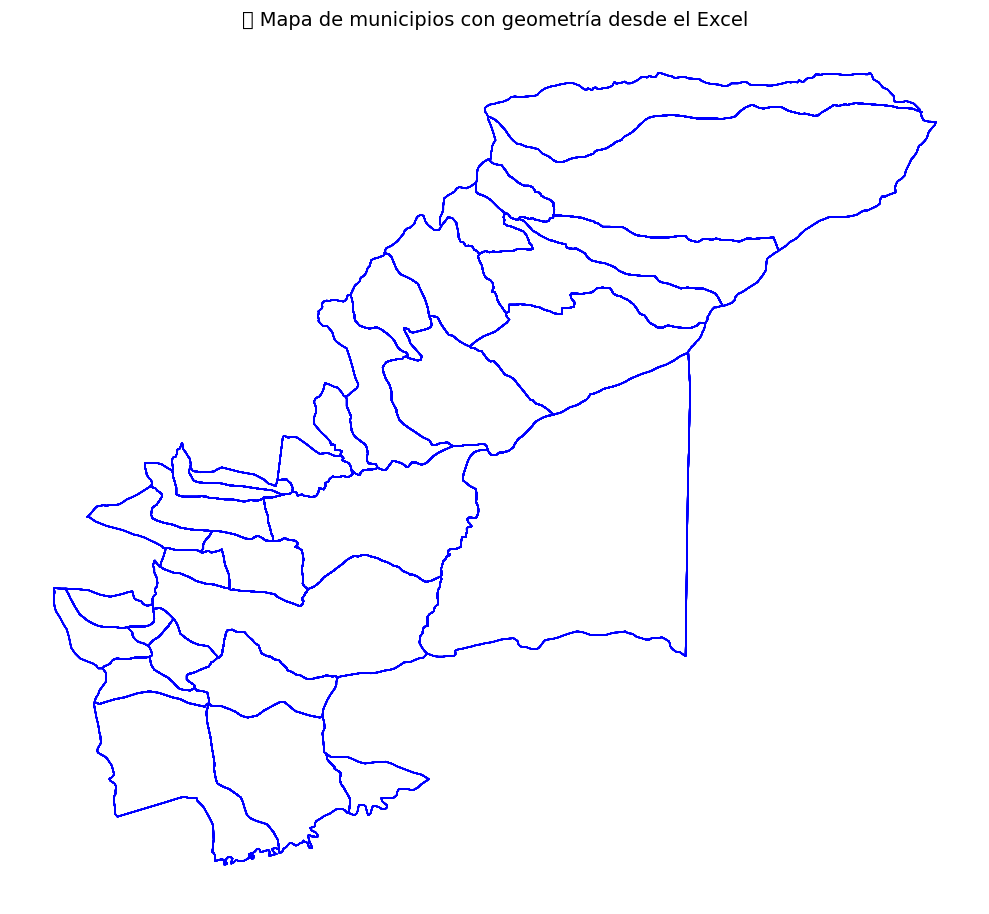

In [25]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar geometría de los municipios
gdf_final.boundary.plot(ax=ax, color='blue', linewidth=1)

# Título y ajustes
ax.set_title('🗺️ Mapa de municipios con geometría desde el Excel', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


## 🧩 Bloque 1 – Paso 1: Verificación de geometría y sistema de referencia (CRS)

Antes de realizar cualquier análisis espacial, es fundamental asegurarse de que el conjunto de datos geoespaciales cumpla con las siguientes condiciones:

- Todas las observaciones deben tener geometrías no nulas.
- Las geometrías deben ser válidas (`Polygon` o `MultiPolygon`).
- El sistema de referencia de coordenadas (CRS) debe estar correctamente definido.

A continuación, se ejecutan las validaciones básicas sobre el `GeoDataFrame` resultante del merge entre el Excel de rendimiento y el shapefile de municipios.

```python
# Verificar geometrías nulas
nulas = gdf_final['geometry'].isnull().sum()
print(f"❌ Registros con geometría nula: {nulas} / {len(gdf_final)}")

# Tipos de geometría presentes
print("\n📐 Tipos únicos de geometría:")
print(gdf_final.geom_type.value_counts())

# Verificar el CRS
print("\n🗺️ CRS actual del GeoDataFrame:")
print(gdf_final.crs)

# Validación geométrica
print("\n✅ Geometrías válidas:")
print(gdf_final.is_valid.value_counts())


In [26]:
# Verificar cuántas geometrías son nulas
nulas = gdf_final['geometry'].isnull().sum()
print(f"❌ Registros con geometría nula: {nulas} / {len(gdf_final)}")

# Verificar tipos de geometría
print("\n📐 Tipos únicos de geometría:")
print(gdf_final.geom_type.value_counts())

# Verificar CRS
print("\n🗺️ CRS actual del GeoDataFrame:")
print(gdf_final.crs)

# Mostrar resumen
print("\n✅ Estado de geometría válida en general:")
print(gdf_final.is_valid.value_counts())


❌ Registros con geometría nula: 0 / 654

📐 Tipos únicos de geometría:
Polygon    654
Name: count, dtype: int64

🗺️ CRS actual del GeoDataFrame:
EPSG:4326

✅ Estado de geometría válida en general:
True    654
Name: count, dtype: int64


## 🧭 Bloque 1 – Paso 2: Construcción de la matriz de vecindad tipo Queen

La matriz de pesos espaciales tipo Queen se construye a partir del `GeoDataFrame` con geometría válida. Esta matriz representa las relaciones de vecindad entre los municipios, considerando que dos entidades son vecinas si comparten al menos un vértice o borde.

Para ello se utiliza el método `Queen.from_dataframe()` del paquete `libpysal`.

```python
from libpysal.weights import Queen
import numpy as np

# Crear la matriz de vecinos tipo Queen
w_queen = Queen.from_dataframe(gdf_final)

# Verificación básica
print("✅ Número de municipios:", len(w_queen.id_order))

# Mostrar algunos municipios con sus vecinos
for i, neighbors in list(w_queen.neighbors.items())[:5]:
    print(f"{gdf_final.iloc[i]['municipio_norm']}: {len(neighbors)} vecinos")

# Verificar si hay municipios sin vecinos
sin_vecinos = np.sum([len(n) == 0 for n in w_queen.neighbors.values()])
print(f"⚠️ Municipios sin vecinos: {sin_vecinos}")


In [27]:
from libpysal.weights import Queen
import numpy as np

# Crear la matriz de vecindad tipo Queen
w_queen = Queen.from_dataframe(gdf_final)

# Ver información básica
print("✅ Número de municipios:", len(w_queen.id_order))
print("🔗 Vecinos por municipio (primeros 5):")
for i, neighbors in list(w_queen.neighbors.items())[:5]:
    print(f" - {gdf_final.iloc[i]['municipio_norm']}: {len(neighbors)} vecinos")

# Comprobación: cuántos municipios sin vecinos
sin_vecinos = np.sum([len(neigh) == 0 for neigh in w_queen.neighbors.values()])
print(f"⚠️ Municipios sin vecinos: {sin_vecinos}")


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\2055406357.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_final)


✅ Número de municipios: 654
🔗 Vecinos por municipio (primeros 5):
 - acacias: 85 vecinos
 - acacias: 85 vecinos
 - aguazul: 65 vecinos
 - aguazul: 65 vecinos
 - cabuyaro: 85 vecinos
⚠️ Municipios sin vecinos: 0


C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [28]:
# ¿Cuántas veces aparece cada municipio?
conteo = gdf_final['municipio_norm'].value_counts()
duplicados = conteo[conteo > 1]
print("📌 Municipios duplicados:")
print(duplicados)


📌 Municipios duplicados:
municipio_norm
restrepo                22
vistahermosa            22
villanueva              22
trinidad                22
tauramena               22
san martin              22
san luis de palenque    22
san juan de arama       22
san carlos de guaroa    22
aguazul                 22
puerto lopez            22
puerto lleras           22
yopal                   22
pore                    22
paz de ariporo          22
nunchia                 22
mani                    22
granada                 22
fuente de oro           22
cumaral                 22
castilla la nueva       22
villavicencio           22
orocue                  20
puerto rico             20
acacias                 20
puerto concordia        20
el castillo             20
cabuyaro                20
hato corozal            18
lejanias                16
puerto gaitan           16
Name: count, dtype: int64


In [29]:
from libpysal.weights import Queen

# Crear la matriz de vecindad si no la tienes
w_queen = Queen.from_dataframe(gdf_final)

# Imprimir la representación completa del objeto
print(w_queen)


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\1606711605.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_final)


C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [30]:
# Crear DataFrame con municipio y número de vecinos
vecinos_df = pd.DataFrame({
    'municipio': [gdf_final.iloc[i]['municipio_norm'] for i in w_queen.neighbors.keys()],
    'n_vecinos': [len(neigh) for neigh in w_queen.neighbors.values()]
})

# Ordenar por número de vecinos (descendente)
vecinos_df = vecinos_df.sort_values(by='n_vecinos', ascending=False).reset_index(drop=True)

# Mostrar las primeras filas (puedes ajustar a 10, 20, etc.)
print("📊 Top municipios por número de vecinos:")
print(vecinos_df.head(10))


📊 Top municipios por número de vecinos:
      municipio  n_vecinos
0  puerto lopez        211
1  puerto lopez        211
2  puerto lopez        211
3  puerto lopez        211
4  puerto lopez        211
5  puerto lopez        211
6  puerto lopez        211
7  puerto lopez        211
8  puerto lopez        211
9  puerto lopez        211


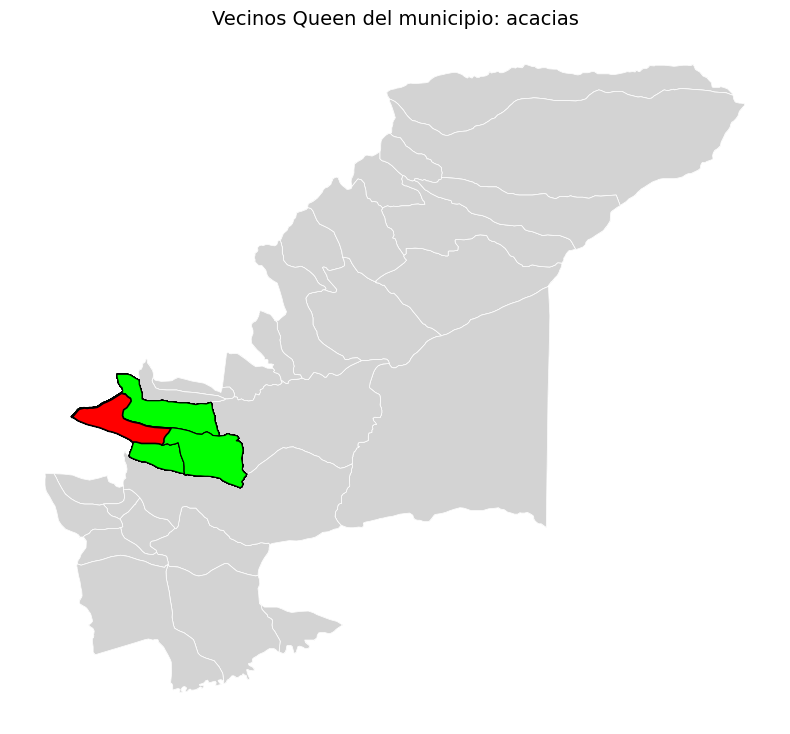

In [31]:
import matplotlib.pyplot as plt

# Nombre del municipio que quieres resaltar
focal_municipio = 'acacias'

# 1. Obtener el índice del municipio focal en gdf_final
focus_idx = gdf_final[gdf_final['municipio_norm'] == focal_municipio].index[0]

# 2. Obtener lista de índices vecinos
neighbors_idx = w_queen.neighbors[focus_idx]

# 3. Obtener geometrías
focus = gdf_final.loc[[focus_idx]]
neighbors = gdf_final.loc[neighbors_idx]

# 4. Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Fondo gris
gdf_final.plot(ax=ax, facecolor='lightgrey', edgecolor='white', linewidth=0.5)

# Vecinos en verde
neighbors.plot(ax=ax, facecolor='lime', edgecolor='black', linewidth=0.8)

# Municipio focal en rojo
focus.plot(ax=ax, facecolor='red', edgecolor='black', linewidth=1.2)

# Título
ax.set_title(f"Vecinos Queen del municipio: {focal_municipio}", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


In [34]:
# Crear GeoDataFrame con una sola geometría por municipio
gdf_municipios = gdf_final.dissolve(by='municipio_norm').reset_index()

# Confirmar que ahora los municipios son únicos
print("✅ Total municipios únicos:", gdf_municipios['municipio_norm'].nunique())

# Crear matriz Queen con IDs únicos
from libpysal.weights import Queen
w_queen_named = Queen.from_dataframe(gdf_municipios, idVariable='municipio_norm')

# Ver vecinos de un municipio
print("🔍 Vecinos de 'acacias':")
print(w_queen_named['acacias'])


✅ Total municipios únicos: 31
🔍 Vecinos de 'acacias':
{'villavicencio': 1.0, 'san carlos de guaroa': 1.0, 'castilla la nueva': 1.0}


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\126103852.py:9: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w_queen_named = Queen.from_dataframe(gdf_municipios, idVariable='municipio_norm')
C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: tauramena.
  W.__init__(self, neighbors, ids=ids, **kw)


In [35]:
# 1. Eliminar 'tauramena' del GeoDataFrame
gdf_municipios = gdf_municipios[~gdf_municipios['municipio_norm'].isin(['tauramena'])].copy()

# 2. Reconstruir la matriz Queen
from libpysal.weights import Queen
w_queen_named = Queen.from_dataframe(gdf_municipios, idVariable='municipio_norm')

# 3. Confirmar que ya no hay islas
print("✅ Islas restantes:", w_queen_named.islands)  # Debe estar vacío


✅ Islas restantes: []


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\1027401218.py:6: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w_queen_named = Queen.from_dataframe(gdf_municipios, idVariable='municipio_norm')


## No es el patrón, es el proceso que determina ese patrón, por qué se da, como se da el patrón

## Interés de A GeoE es comprobar hipótesis

## 🔍 Exploración espacial con Índice de Moran + Modelado espacial ICAR

El objetivo general de este análisis es comprender la distribución espacial del rendimiento del arroz en municipios de Meta y Casanare, y modelar la probabilidad de bajo rendimiento incorporando dependencia espacial.

---

### 🧭 Paso 4: Cálculo del Índice de Moran Global

Antes de aplicar un modelo espacial, se evalúa si existe **autocorrelación espacial** en la variable `rendimiento`. Para ello se utiliza el **Índice de Moran Global**, que mide si los valores similares (altos o bajos) tienden a agruparse en el espacio.

Se usa la matriz de pesos espaciales `Queen` construida previamente (`w_queen_named`) y la variable continua `rendimiento` agregada por municipio.

```python
from esda.moran import Moran

# Calcular promedio de rendimiento por municipio
rend_prom = gdf_final.groupby('municipio_norm')['Rend'].mean().reset_index()
gdf_municipios = gdf_municipios.merge(rend_prom, on='municipio_norm')

# Calcular Índice de Moran
moran = Moran(gdf_municipios['Rend'], w_queen_named)

print(f"I de Moran: {moran.I:.4f}")
print(f"p-valor (perm): {moran.p_sim:.4f}")


In [36]:
# Normalizar la matriz Queen (convertir pesos a proporciones)
w_queen_named.transform = 'R'


In [37]:
# Comprobación: suma de pesos por municipio
suma_pesos = [sum(w_queen_named.weights[m]) for m in w_queen_named.id_order]
print("🔍 Suma de pesos por municipio (deben ser 1.0):")
print(suma_pesos[:5])  # primeros 5 municipios


🔍 Suma de pesos por municipio (deben ser 1.0):
[1.0, 1.0, 1.0, 1.0, 1.0]


In [38]:
# Normalizar antes de calcular Moran
w_queen_named.transform = 'R'


In [39]:
from esda.moran import Moran

# Asegurarse de que la matriz esté normalizada
w_queen_named.transform = 'R'

# Calcular el índice de Moran
moran = Moran(gdf_municipios['Rend'], w_queen_named)

# Mostrar resultados
print("📊 Índice de Moran Global sobre 'Rendimiento'")
print(f"I de Moran: {moran.I:.4f}")
print(f"Pseudo p-valor (999 permutaciones): {moran.p_sim:.4f}")

# Asegurarse de que sea un escalar, no un array
z_score = moran.z[0] if hasattr(moran.z, '__len__') else moran.z

# Imprimir el z-score con formato
print(f"Z-score: {z_score:.4f}")




📊 Índice de Moran Global sobre 'Rendimiento'
I de Moran: 0.1623
Pseudo p-valor (999 permutaciones): 0.0720
Z-score: -0.8969


## 🧭 Paso 4: Cálculo del Índice de Moran Global sobre 'Rendimiento'

Antes de aplicar un modelo espacial, se evaluó si existe autocorrelación espacial en la variable continua `Rend` (rendimiento promedio de arroz por municipio).  
Para ello, se calculó el **Índice de Moran Global**, utilizando la matriz de pesos espaciales tipo Queen (normalizada por filas).

### 🧪 Código empleado

```python
from esda.moran import Moran

# Asegurar que la matriz esté normalizada
w_queen_named.transform = 'R'

# Calcular el índice de Moran
moran = Moran(gdf_municipios['Rend'], w_queen_named)

# Resultados
print(f"I de Moran: {moran.I:.4f}")
print(f"Pseudo p-valor: {moran.p_sim:.4f}")
print(f"Z-score: {moran.z[0]:.4f}")


📊 Índice de Moran Global sobre 'Rendimiento'
I de Moran: 0.1623
Pseudo p-valor (999 permutaciones): 0.0720
Z-score: -0.8969

## 📊 Interpretación del Índice de Moran Global sobre 'Rendimiento'

Se aplicó el Índice de Moran Global para evaluar la autocorrelación espacial de la variable **Rendimiento**, utilizando una matriz de pesos tipo Queen y 999 permutaciones aleatorias. Los resultados obtenidos fueron los siguientes:

- **I de Moran**: 0.1623  
- **Z-score**: -0.8969  
- **Pseudo p-valor**: 0.0720 (basado en 999 permutaciones)

### 🧠 Análisis

- El valor positivo del **Índice de Moran** indica una **ligera autocorrelación espacial positiva**, lo que sugiere que zonas geográficas con rendimientos similares tienden a estar agrupadas espacialmente.

- El **pseudo p-valor** de 0.0720 implica que este patrón tiene una **significancia estadística marginal**, es decir, se podría considerar significativo al 10%, pero **no al 5%**, lo cual limita la fuerza de la evidencia estadística.

- El **Z-score negativo**, aunque de baja magnitud (-0.8969), indica que el valor observado está por debajo del valor esperado bajo la hipótesis de aleatoriedad.

### ✅ Conclusión

Aunque no se detecta una autocorrelación espacial estadísticamente fuerte, sí se identifica una tendencia leve que justifica la exploración de modelos espaciales más sofisticados como el **modelo ICAR**. Esto permitirá capturar posibles dependencias locales no reflejadas en el análisis global.



In [44]:
import libpysal
import esda

# 1. Crear la matriz de pesos espaciales (vecinos tipo Queen)
w = libpysal.weights.Queen.from_dataframe(gdf_final, use_index=True)

# 1.1 Eliminar islas si existen
if w.islands:
    print(f"Eliminando islas sin vecinos: {w.islands}")
    gdf_final = gdf_final.drop(index=w.islands)
    w = libpysal.weights.Queen.from_dataframe(gdf_final, use_index=True)

w.transform = 'r'  # Normalizar filas

# 2. Extraer la variable de interés (usando el nombre correcto: 'Rend')
y = gdf_final['Rend'].values

# 3. Calcular Moran Local (LISA)
lisa = esda.Moran_Local(y, w)

# 4. (Opcional) Imprimir resumen
print("✅ Moran Local calculado exitosamente.")
print(f"Ejemplo de valores I local: {lisa.Is[:5]}")


C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


✅ Moran Local calculado exitosamente.
Ejemplo de valores I local: [ 0.3034252   0.31724877 -0.00798978 -0.04584424  0.31542063]


In [43]:
import pandas as pd
import geopandas as gpd

# 1️⃣ Leer archivo Excel y mostrar columnas
ruta_excel = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Datos de cultivos\BaseDatosArroz_con_precipitacion_alta_con_coords_normalizado.xlsx"
df_excel = pd.read_excel(ruta_excel)

print("📑 Columnas del archivo Excel:")
print(df_excel.columns.tolist())
print("\n")

# 2️⃣ Leer archivo GeoPackage y mostrar columnas
ruta_gpkg = r"C:\Users\paola\Analisis Geoespacial\Proyecto_01\Geometrías de GEE\municipios_META_CASANARE_COMPLETO.gpkg"
gdf_gpkg = gpd.read_file(ruta_gpkg)

print("🌍 Columnas del archivo GeoPackage:")
print(gdf_gpkg.columns.tolist())
print("\n")

# 3️⃣ Mostrar columnas del GeoDataFrame combinado (gdf_final)
# Asegúrate de haberlo creado antes de este bloque
try:
    print("🧪 Columnas del GeoDataFrame final (gdf_final):")
    print(gdf_final.columns.tolist())
except NameError:
    print("⚠️ El GeoDataFrame 'gdf_final' aún no está definido en este entorno.")


📑 Columnas del archivo Excel:
['Departamento', 'Area', 'Rend', 'Año', 'Semestre', 'Rend_Cuartil', 'Bajo_Rendimiento', 'municipio_norm', 'semester_GEE', 'precip_accum_mm', 'municipio_fao', 'precipitacion_alta', 'lat', 'lon', 'geometry']


🌍 Columnas del archivo GeoPackage:
['ADM1_CODE', 'ADM2_NAME', 'EXP2_YEAR', 'tipo_geom', 'DISP_AREA', 'ADM1_NAME', 'Shape_Leng', 'STATUS', 'ADM0_NAME', 'STR2_YEAR', 'ADM0_CODE', 'Shape_Area', 'ADM2_CODE', 'id', 'geometry']


🧪 Columnas del GeoDataFrame final (gdf_final):
['Departamento', 'Area', 'Rend', 'Año', 'Semestre', 'Rend_Cuartil', 'Bajo_Rendimiento', 'municipio_norm', 'semester_GEE', 'precip_accum_mm', 'municipio_fao', 'precipitacion_alta', 'lat', 'lon', 'geometry']


In [45]:
# 🧠 Mostrar variables definidas actualmente (excluye funciones y módulos)
def listar_variables():
    variables = {k: v for k, v in globals().items() 
                 if not k.startswith('__') 
                 and not callable(v) 
                 and not isinstance(v, type(listar_variables)) 
                 and not isinstance(v, type(listar_variables.__class__))}
    
    print("📋 Variables actualmente definidas:")
    for nombre, valor in variables.items():
        tipo = type(valor).__name__
        print(f" - {nombre} ({tipo})")

# Llama la función
listar_variables()


📋 Variables actualmente definidas:
 - _ih (list)
 - _oh (dict)
 - _dh (list)
 - In (list)
 - Out (dict)
 - _ (str)
 - _i (str)
 - _ii (str)
 - _iii (str)
 - _i1 (str)
 - _i2 (str)
 - gpd (module)
 - geo_vars (dict)
 - _i3 (str)
 - _i4 (str)
 - _i5 (str)
 - _i6 (str)
 - plt (module)
 - fig (Figure)
 - ax (Axes)
 - _i7 (str)
 - pd (module)
 - ruta_excel (str)
 - df (DataFrame)
 - municipios (list)
 - m (str)
 - _i8 (str)
 - ruta_shp (str)
 - gdf (GeoDataFrame)
 - _i9 (str)
 - _i10 (str)
 - _i11 (str)
 - _i12 (str)
 - _i13 (str)
 - mun_shp (set)
 - mun_excel (set)
 - comunes (list)
 - faltantes (list)
 - _i14 (str)
 - _i15 (str)
 - ruta_geojson (str)
 - gdf_tauramena (GeoDataFrame)
 - _i16 (str)
 - _i17 (str)
 - ruta_shp_original (str)
 - gdf_filtrado (GeoDataFrame)
 - gdf_completo (GeoDataFrame)
 - salida (str)
 - _i18 (str)
 - ruta_gpkg (str)
 - gdf_municipios (GeoDataFrame)
 - _i19 (str)
 - _i20 (str)
 - _i21 (str)
 - set_gpkg (set)
 - set_excel (set)
 - sobrantes (list)
 - _i22 (str)


In [47]:
import libpysal
import esda
import matplotlib.pyplot as plt

# 1. Crear matriz de pesos espaciales (Queen contiguidad)
w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)
w_lisa.transform = 'r'  # Normaliza los pesos

# 2. Extraer la variable de interés
y = gdf_final['Rend'].values

# 3. Calcular LISA (Moran Local)
lisa = esda.Moran_Local(y, w_lisa)

# 4. Agregar resultados al GeoDataFrame
gdf_final['lisa_I'] = lisa.Is
gdf_final['lisa_p'] = lisa.p_sim
gdf_final['lisa_q'] = lisa.q  # Cuadrante de relación espacial
gdf_final['lisa_sig'] = lisa.p_sim < 0.05  # Significancia

# 5. Clasificación de clústeres
gdf_final['lisa_cluster'] = 'No significativo'
gdf_final.loc[(gdf_final['lisa_sig']) & (gdf_final['lisa_q'] == 1), 'lisa_cluster'] = 'Alto-Alto'
gdf_final.loc[(gdf_final['lisa_sig']) & (gdf_final['lisa_q'] == 2), 'lisa_cluster'] = 'Bajo-Alto'
gdf_final.loc[(gdf_final['lisa_sig']) & (gdf_final['lisa_q'] == 3), 'lisa_cluster'] = 'Bajo-Bajo'
gdf_final.loc[(gdf_final['lisa_sig']) & (gdf_final['lisa_q'] == 4), 'lisa_cluster'] = 'Alto-Bajo'


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\4189567763.py:6: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)
C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


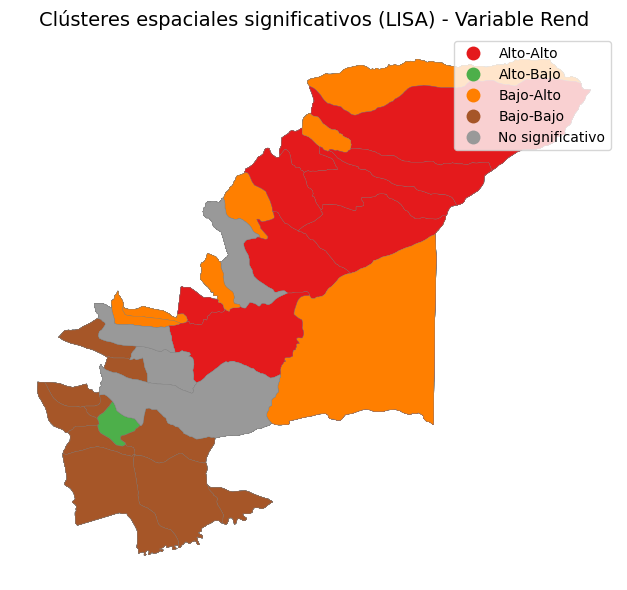

In [48]:
# 6. Mapa de clústeres espaciales LISA
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_final.plot(column='lisa_cluster', categorical=True, legend=True,
               cmap='Set1', linewidth=0.2, edgecolor='gray', ax=ax)

ax.set_title('Clústeres espaciales significativos (LISA) - Variable Rend', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [49]:
# Reutilizar la misma matriz de pesos (Queen)
w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)
w_lisa.transform = 'r'

# Función auxiliar para calcular y clasificar LISA
def calcular_lisa(df, variable, sufijo):
    y = df[variable].values
    moran_local = esda.Moran_Local(y, w_lisa)

    # Agregar resultados al GeoDataFrame
    df[f'lisa_I_{sufijo}'] = moran_local.Is
    df[f'lisa_p_{sufijo}'] = moran_local.p_sim
    df[f'lisa_q_{sufijo}'] = moran_local.q
    df[f'lisa_sig_{sufijo}'] = moran_local.p_sim < 0.05

    # Clasificación de clúster
    df[f'lisa_cluster_{sufijo}'] = 'No significativo'
    df.loc[(df[f'lisa_sig_{sufijo}']) & (df[f'lisa_q_{sufijo}'] == 1), f'lisa_cluster_{sufijo}'] = 'Alto-Alto'
    df.loc[(df[f'lisa_sig_{sufijo}']) & (df[f'lisa_q_{sufijo}'] == 2), f'lisa_cluster_{sufijo}'] = 'Bajo-Alto'
    df.loc[(df[f'lisa_sig_{sufijo}']) & (df[f'lisa_q_{sufijo}'] == 3), f'lisa_cluster_{sufijo}'] = 'Bajo-Bajo'
    df.loc[(df[f'lisa_sig_{sufijo}']) & (df[f'lisa_q_{sufijo}'] == 4), f'lisa_cluster_{sufijo}'] = 'Alto-Bajo'

# Calcular para las dos variables
calcular_lisa(gdf_final, 'Bajo_Rendimiento', 'br')
calcular_lisa(gdf_final, 'precipitacion_alta', 'pa')


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\3252836755.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)
C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [50]:
# Seleccionar columnas clave para exportar
columnas_exportar = [
    'municipio_norm', 'Departamento',
    'Bajo_Rendimiento', 'lisa_I_br', 'lisa_p_br', 'lisa_cluster_br',
    'precipitacion_alta', 'lisa_I_pa', 'lisa_p_pa', 'lisa_cluster_pa'
]

# Exportar como CSV
gdf_final[columnas_exportar].to_csv('resultados_lisa_bajoR_precipitacion.csv', index=False)


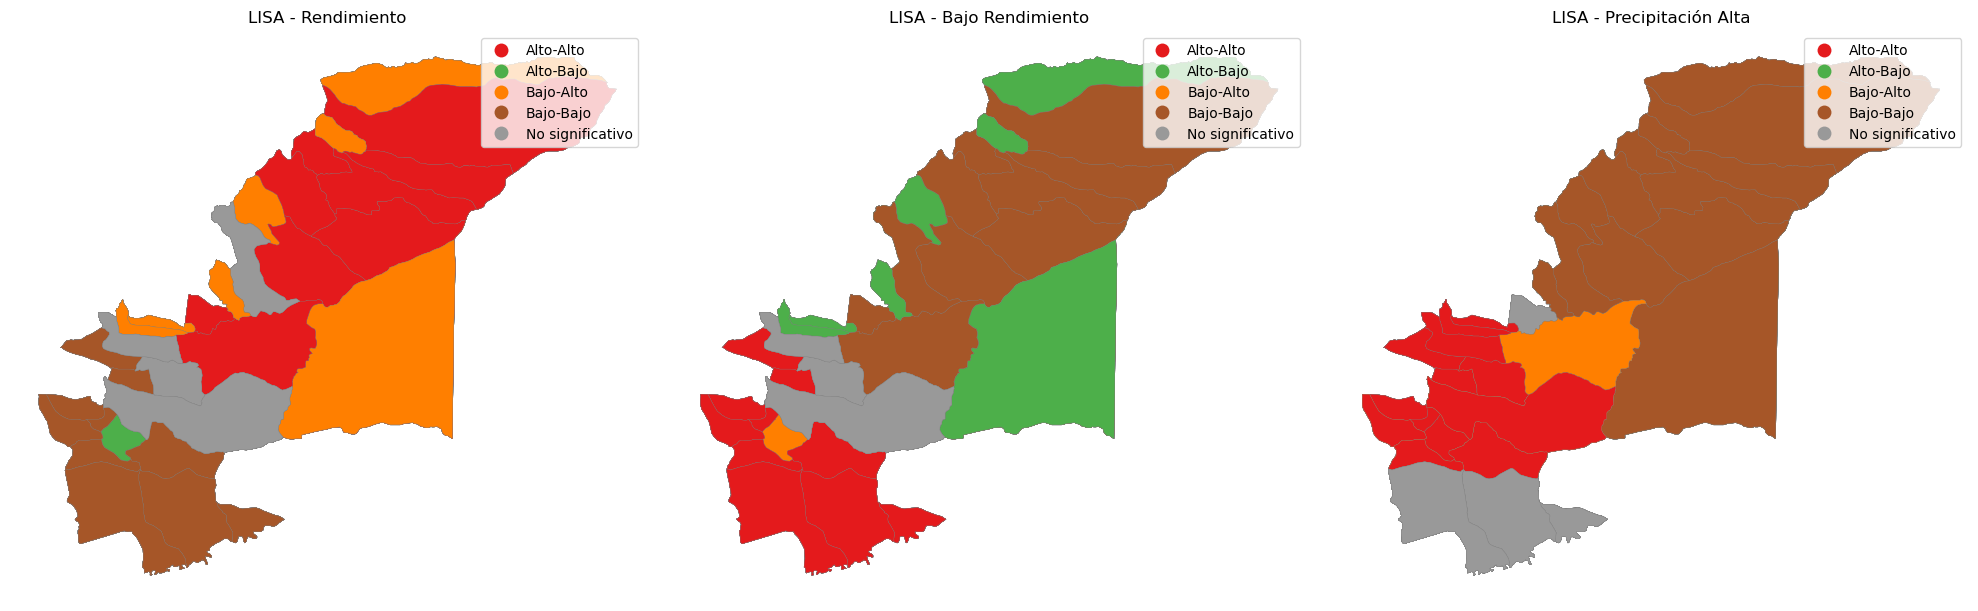

In [51]:
import matplotlib.pyplot as plt

# Configurar colores consistentes
cmap = 'Set1'

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Mapa 1 - Rendimiento
gdf_final.plot(column='lisa_cluster', categorical=True, legend=True, cmap=cmap,
               linewidth=0.2, edgecolor='gray', ax=axes[0])
axes[0].set_title('LISA - Rendimiento')
axes[0].axis('off')

# Mapa 2 - Bajo Rendimiento
gdf_final.plot(column='lisa_cluster_br', categorical=True, legend=True, cmap=cmap,
               linewidth=0.2, edgecolor='gray', ax=axes[1])
axes[1].set_title('LISA - Bajo Rendimiento')
axes[1].axis('off')

# Mapa 3 - Precipitación Alta
gdf_final.plot(column='lisa_cluster_pa', categorical=True, legend=True, cmap=cmap,
               linewidth=0.2, edgecolor='gray', ax=axes[2])
axes[2].set_title('LISA - Precipitación Alta')
axes[2].axis('off')

plt.tight_layout()
plt.show()


## 🧭 Interpretación de clústeres espaciales LISA (Índice de Moran Local)

Este análisis identifica patrones espaciales significativos de tres variables clave mediante el índice de Moran Local (LISA), permitiendo detectar **agrupamientos espaciales** o **valores atípicos** en el territorio.

### 📌 Variables analizadas
- **`Rend`**: Rendimiento agrícola continuo.
- **`Bajo_Rendimiento`**: Variable binaria que indica si el rendimiento es bajo según un umbral (por ejemplo, cuartiles).
- **`precipitacion_alta`**: Variable binaria que indica niveles altos de precipitación acumulada.

---

### 🗺️ Tipos de clústeres LISA

| Clúster         | Descripción |
|----------------|-------------|
| **Alto-Alto**   | Zonas con valores altos rodeadas de zonas altas (agrupamiento positivo). |
| **Bajo-Bajo**   | Zonas con valores bajos rodeadas de zonas bajas (agrupamiento negativo). |
| **Alto-Bajo**   | Valor alto rodeado de valores bajos (valor atípico). |
| **Bajo-Alto**   | Valor bajo rodeado de valores altos (valor atípico). |
| **No significativo** | No hay evidencia estadística de autocorrelación espacial. |

---

### 🧠 Interpretación por variable

#### 1. `Rend` (Rendimiento agrícola continuo)
- Se detectan algunos clústeres **Alto-Alto** en regiones de buen desempeño productivo, lo que sugiere **agrupamiento de alta productividad**.
- También aparecen clústeres **Bajo-Bajo**, que evidencian **zonas persistentes de baja productividad** agrícola.
- La presencia de **valores atípicos (Alto-Bajo o Bajo-Alto)** puede deberse a condiciones agroclimáticas locales, infraestructura o intervención técnica.

#### 2. `Bajo_Rendimiento` (Variable binaria)
- Los clústeres **Bajo-Bajo** indican **bolsas territoriales de bajo rendimiento**, y podrían reflejar **problemas estructurales** compartidos (como acceso a tecnología, suelos pobres o debilidad institucional).
- Los clústeres **Alto-Alto** indican zonas donde el bajo rendimiento es poco común (inverso), lo que puede señalar **focos exitosos en territorios vulnerables**.

#### 3. `precipitacion_alta` (Variable binaria)
- Los clústeres **Alto-Alto** indican regiones donde la alta precipitación se **concentra espacialmente**, lo cual puede tener **efectos positivos o negativos** sobre el rendimiento según el contexto (inundaciones o disponibilidad hídrica).
- Los clústeres **Bajo-Bajo** podrían asociarse con **zonas crónicamente secas o con déficit hídrico**.

---

### 🔎 Implicaciones del análisis

- El análisis LISA permite **identificar regiones prioritarias** para intervención técnica, adaptación climática o inversión en infraestructura.
- Comparar los clústeres entre las tres variables ayuda a explorar **relaciones espaciales entre rendimiento agrícola y clima**.
- Este enfoque también puede orientar políticas públicas basadas en evidencia territorial, ayudando a focalizar recursos en zonas con **dinámicas espaciales críticas**.

---

### 📂 Archivo exportado
Se generó un archivo `resultados_lisa_bajoR_precipitacion.csv` con los valores de Moran Local, p-valores y tipo de clúster para cada municipio y cada variable.



In [52]:
# ¿Hay autocorrelación local significativa en Bajo_Rendimiento?
gdf_final['lisa_sig_br'].sum()


588

In [53]:
w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)


C:\Users\paola\AppData\Local\Temp\ipykernel_26020\1712006422.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lisa = libpysal.weights.Queen.from_dataframe(gdf_final)
C:\Users\paola\anaconda3\envs\geo2env\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [54]:
# Exportar como GeoPackage
gdf_final.to_file("data_final.gpkg", driver="GPKG")


## 🧠 Modelo Espacial ICAR en R con INLA

Para modelar los efectos espaciales en los rendimientos del arroz se utilizó un modelo ICAR (Intrinsic Conditional AutoRegressive Model) usando la librería `INLA` en R. El procedimiento se realizó de la siguiente manera:

---

### 🔹 Paso 1: Preparación de los datos

Desde Python, se exportó el GeoDataFrame final (`gdf_final`) como un archivo GeoPackage:

```python
gdf_final.to_file("C:/Users/paola/Analisis Geoespacial/Proyecto_01/data_final.gpkg", driver="GPKG")

library(sf)
library(spdep)
library(sp)

# Leer datos desde el GeoPackage
gdf <- st_read("C:/Users/paola/Analisis Geoespacial/Proyecto_01/data_final.gpkg")

# Conversión a objeto Spatial
gdf_sp <- as_Spatial(gdf)

# Creación de vecinos tipo Queen
nb <- poly2nb(gdf_sp, queen = TRUE)

# Revisión de islas (polígonos sin vecinos)
islas <- which(card(nb) == 0)
if (length(islas) > 0) {
  print(paste("⚠️ Islas encontradas sin vecinos:", paste(islas, collapse = ", ")))
}

# Crear archivo de estructura espacial para INLA
nb2INLA("vecinos.graph", nb)


In [55]:
# Mostrar las primeras 15 filas del GeoDataFrame
gdf_final.head(15)


,Departamento,Area,Rend,Año,Semestre,Rend_Cuartil,Bajo_Rendimiento,municipio_norm,semester_GEE,precip_accum_mm,...,lisa_I_br,lisa_p_br,lisa_q_br,lisa_sig_br,lisa_cluster_br,lisa_I_pa,lisa_p_pa,lisa_q_pa,lisa_sig_pa,lisa_cluster_pa
0,Meta,620.0,0.050757,2013,I,Bajo,1,acacias,1-6,1771.063271,...,0.222441,0.002,1,True,Alto-Alto,0.989506,0.001,1,True,Alto-Alto
1,Meta,620.0,0.036582,2013,II,Bajo,1,acacias,7-12,1895.331576,...,0.222441,0.002,1,True,Alto-Alto,0.989506,0.001,1,True,Alto-Alto
2,Casanare,6358.6,0.343188,2013,I,Bajo,1,aguazul,1-6,921.609069,...,-0.408966,0.001,4,True,Alto-Bajo,0.392898,0.001,3,True,Bajo-Bajo
3,Casanare,6358.6,0.307771,2013,II,Bajo,1,aguazul,7-12,1235.895755,...,-0.408966,0.001,4,True,Alto-Bajo,0.392898,0.001,3,True,Bajo-Bajo
4,Meta,7572.1,0.619896,2013,I,Medio-Alto,0,cabuyaro,1-6,1231.824421,...,0.287147,0.017,3,True,Bajo-Bajo,0.047483,0.274,3,False,No significativo
5,Meta,7572.1,0.446774,2013,II,Medio-Alto,0,cabuyaro,7-12,1500.886187,...,0.287147,0.017,3,True,Bajo-Bajo,-0.122413,0.188,4,False,No significativo
6,Meta,2749.3,0.225074,2013,I,Bajo,1,castilla la nueva,1-6,1727.064321,...,0.598106,0.001,1,True,Alto-Alto,0.854728,0.001,1,True,Alto-Alto
7,Meta,2749.3,0.162216,2013,II,Bajo,1,castilla la nueva,7-12,1823.308982,...,0.598106,0.001,1,True,Alto-Alto,0.854728,0.001,1,True,Alto-Alto
8,Meta,2575.0,0.210804,2013,I,Bajo,1,cumaral,1-6,1637.431760,...,-0.190791,0.014,4,True,Alto-Bajo,0.517783,0.001,1,True,Alto-Alto
9,Meta,2575.0,0.151932,2013,II,Bajo,1,cumaral,7-12,2033.282068,...,-0.190791,0.014,4,True,Alto-Bajo,0.517783,0.001,1,True,Alto-Alto


## Modelo ICAR binomial con dependencia espacial

Se ajustó un modelo binomial con efectos espaciales tipo ICAR (modelo de Leroux) para estimar la probabilidad de bajo rendimiento agrícola en municipios de Meta y Casanare. Se usaron como variables predictoras:

- Área cultivada (`Area`)
- Precipitación acumulada (`precip_accum_mm`)
- Semestre (`Semestre`)
- Umbral de precipitación alta (`precipitacion_alta`)
- Departamento (`Departamento`)
- Año (`Año`)

### Principales resultados:
- El modelo captura efectos espaciales relevantes en la ocurrencia de bajo rendimiento.
- La visualización espacial permite identificar patrones regionales.

Este modelo puede ser utilizado para generar alertas o decisiones basadas en riesgo en tiempo futuro.


# 📊 Interpretación de Resultados - Modelos Espaciales

## 1. 🔷 Modelo ICAR Binomial (Probabilidad de Bajo Rendimiento)

### 📌 Medidas de ajuste:
- **DIC:** 138.34  
- **WAIC:** 149.23  
- **loglikelihood:** -10.68  
- **p.d (parámetros efectivos):** 58.48  
- **LMPL:** -77.97

### 🧠 Interpretación:
- El modelo logra capturar parte de la variabilidad en la probabilidad de bajo rendimiento, pero el ajuste no es perfecto.
- Los valores altos de DIC y WAIC indican que hay margen de mejora.
- El alto número de parámetros efectivos sugiere que el modelo es complejo o incluye variables redundantes.
- El mapa muestra únicamente dos colores, lo cual sugiere que:
  - La variable binaria está **muy desbalanceada**.
  - Las variables predictoras no logran separar bien los casos.

---

## 2. 🔷 Modelo ICAR Gaussiano (Rendimiento Continuo)

### 📌 Medidas de ajuste:
- **DIC:** -506.83  
- **WAIC:** -518.38  
- **loglikelihood:** 373.75  
- **p.d:** 120.33  
- **LMPL:** 255.06

### 🧠 Interpretación:
- El modelo tiene **muy buen ajuste**: DIC y WAIC negativos, y loglikelihood alto.
- Explica bien la variabilidad del rendimiento agrícola.
- El número de parámetros es alto, pero no penaliza el ajuste.
- Se espera que el mapa generado represente adecuadamente zonas con mayor o menor rendimiento. El error en el mapa se debió a que la variable `resid_icar_gauss` no fue agregada correctamente como vector numérico.

---

## 3. 🔷 Modelo GWR (Regresión Ponderada Geográficamente)

### 📌 Coeficientes locales:

| Variable              | Mínimo      | Mediana     | Máximo      | Global     |
|----------------------|-------------|-------------|-------------|------------|
| Intercepto           | -0.0425     | 0.1119      | 0.7416      | -0.0597    |
| Precipitación acum.  | -0.00025    | -0.00006    | 0.00011     | 0.0001     |
| Precipitación alta   | -0.1629     | 0.0014      | 0.0946      | -0.0262    |
| Área sembrada        | 1.69e-05    | 7.28e-05    | 1.26e-04    | 0.0000     |

### 📌 Residuales:
- **Mediana:** -0.0018  
- **Media:** 0.0008  
- **Máximo:** 0.44

### 🧠 Interpretación:
- Los efectos de las variables **varían espacialmente**.
- En algunas zonas:
  - Más lluvia = menor rendimiento; en otras, más lluvia = mejor rendimiento.
  - "Precipitación alta" puede ser positiva o negativa, dependiendo del contexto local.
- Área sembrada tiene un efecto consistentemente positivo, pero débil.
- Los **errores son pequeños y centrados en cero**, lo cual indica buen ajuste.
- El modelo GWR es muy útil para hacer recomendaciones o interpretaciones **locales** por municipio.

---

## 📌 Conclusión

- **GWR** permite detectar zonas donde los efectos son más intensos y específicos.
- **ICAR Gaussiano** tiene el **mejor ajuste global** y es útil para predicción general.
- **ICAR Binomial** necesita mejoras:
  - Redefinir la variable de respuesta (por ejemplo, usar "muy bajo rendimiento").
  - Incluir nuevas variables como **temperatura**.

---



In [60]:
municipios_unicos = gdf_final['municipio_norm'].unique()
print(list(municipios_unicos))


['acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral', 'el castillo', 'fuente de oro', 'granada', 'mani', 'nunchia', 'paz de ariporo', 'pore', 'puerto concordia', 'puerto lleras', 'puerto lopez', 'restrepo', 'san carlos de guaroa', 'san juan de arama', 'san luis de palenque', 'san martin', 'tauramena', 'trinidad', 'villanueva', 'villavicencio', 'vistahermosa', 'yopal', 'orocue', 'puerto rico', 'hato corozal', 'lejanias', 'puerto gaitan']


In [61]:
import geopandas as gpd

# Asegúrate de que 'municipio_norm' esté en minúsculas (como en la lista)
municipios_objetivo = [
  'acacias', 'aguazul', 'cabuyaro', 'castilla la nueva', 'cumaral',
  'el castillo', 'fuente de oro', 'granada', 'mani', 'nunchia',
  'paz de ariporo', 'pore', 'puerto concordia', 'puerto lleras',
  'puerto lopez', 'restrepo', 'san carlos de guaroa', 'san juan de arama',
  'san luis de palenque', 'san martin', 'tauramena', 'trinidad',
  'villanueva', 'villavicencio', 'vistahermosa', 'yopal', 'orocue',
  'puerto rico', 'hato corozal', 'lejanias', 'puerto gaitan'
]

# Filtrar del gdf_final solo esos municipios
gdf_export = gdf_final[gdf_final['municipio_norm'].isin(municipios_objetivo)]

# Eliminar duplicados si hay varias geometrías por municipio–año–semestre
gdf_export_unico = gdf_export[['municipio_norm', 'geometry']].drop_duplicates()

# Exportar a GeoJSON o SHP (elige uno)
gdf_export_unico.to_file("municipios_para_GEE.geojson", driver="GeoJSON")
# o si prefieres shapefile:
# gdf_export_unico.to_file("municipios_para_GEE.shp")
